In [1]:
import pandas as pd
import matplotlib.pyplot as plt
file = 'G:/Mon Drive/PCO/data/'

# Chargement des données

## chargement des CRO

In [2]:
# chargement des CRO générés avec deux modèles différents
CRO= pd.read_csv(f'{file}\CRO-df.csv', sep=';', dtype=str)
print('nb de CRO total:', len(CRO))

nb de CRO total: 2319


In [3]:
lignes_manquantes = CRO[CRO.isna().any(axis=1)]
lignes_manquantes

CRO id_diag id_med  \
507                                                 NaN      36      7   
510                                                 NaN      33      0   
920                                                 NaN      53      8   
1699                                                NaN      23      0   
1949                                                NaN      71     27   
1989                                                NaN      72     82   
2027                                                NaN      77     40   
2086                                                NaN      76     48   
2122                                           Résumé :     NaN    NaN   
2123                     Nom du patient : Noémi Besnard     NaN    NaN   
2124                             Naissance : 08/10/1936     NaN    NaN   
2125  Adresse : 1, rue Thomas Bousquet, 10860 Berthe...     NaN    NaN   
2126  Numéro de sécurité sociale : 2 1936 10 10860 3...     NaN    NaN   
2127         Anatomopathologiste : Dr Thierry Goncalves     NaN    NaN   
2128                      Observations macroscopiques :     NaN    NaN   
2129  La pièce opératoire presente une forme ovale, ...     NaN    NaN   
2130                         Description histologique :     NaN    NaN   
2195                                                NaN      69     42   
2196                                                NaN      75     98   
2239                                                NaN      70     91   

                         nir                               source   operation  
507   2 1951 04 39134 461 39  codellama/CodeLlama-34b-Instruct-hf  colectomie  
510   1 1980 06 52682 814 34  codellama/CodeLlama-34b-Instruct-hf     biopsie  
920   1 2001 11 39531 006 42  codellama/CodeLlama-34b-Instruct-hf     biopsie  
1699  1 1982 02 68103 494 12  codellama/CodeLlama-34b-Instruct-hf     biopsie  
1949  1 1998 12 30730 949 19       meta-llama/Llama-2-70b-chat-hf     biopsie  
1989  1 1939 01 35816 175 41       meta-llama/Llama-2-70b-chat-hf     biopsie  
2027  2 1999 06 83409 198 86       meta-llama/Llama-2-70b-chat-hf     exérèse  
2086  2 1972 09 20351 277 07       meta-llama/Llama-2-70b-chat-hf     exérèse  
2122                     NaN                                  NaN         NaN  
2123                     NaN                                  NaN         NaN  
2124                     NaN                                  NaN         NaN  
2125                     NaN                                  NaN         NaN  
2126                     NaN                                  NaN         NaN  
2127                     NaN                                  NaN         NaN  
2128                     NaN                                  NaN         NaN  
2129                     NaN                                  NaN         NaN  
2130                     NaN                                  NaN         NaN  
2195  1 1994 08 91336 622 61       meta-llama/Llama-2-70b-chat-hf     exérèse  
2196  2 1970 07 39970 369 16       meta-llama/Llama-2-70b-chat-hf     exérèse  
2239  1 1978 08 33450 775 21       meta-llama/Llama-2-70b-chat-hf     exérèse

In [4]:
CRO = CRO.dropna()
print('nb de CRO total après supp des lignes nan:', len(CRO))

nb de CRO total après supp des lignes nan: 2299


In [5]:
CRO.head(5)

CRO id_diag id_med  \
0  L'examen histopathologique de l'exérèse de pea...      20     72   
1  Centre Hospitalier Universitaire\nService d'An...      60      7   
2  Dr Thierry Foucher\nAnatomopathologiste\nLabor...      20     21   
3  Compte rendu d'histopathologie\n\nNom de l'ana...      61     52   
4  Compte rendu d'histopathologie\n\nPatient:\nNo...      22     65   

                      nir      source   operation  
0  1 1952 02 66734 047 03  chatGPT3.5     exérèse  
1  1 1980 01 38964 514 29  chatGPT3.5     biopsie  
2  1 1974 06 39507 694 59  chatGPT3.5     biopsie  
3  1 1980 01 38964 514 29  chatGPT3.5  colectomie  
4  1 1986 08 87668 878 18  chatGPT3.5     exérèse

## chargements des données annexes (patients, anatomopathologistes, diagnostics)

In [6]:
# chargement des data de patients, anatomopathologistes, diagnostics
patients = pd.read_csv(f'{file}patients.csv', sep=';', dtype=str)
meds = pd.read_csv(f'{file}anatomopathologists.csv', sep=';', dtype=str)
diagnostics = pd.read_csv(f'{file}diagnostics.csv', sep=';', dtype=str)

In [7]:
patients.head(5)

name                                    address    birthday  \
0    Gilbert Étienne   49, boulevard de Jacques, 21813 Legendre  15/01/1963   
1   Joseph Berthelot   avenue Georges David, 65552 Saint Simone  04/11/1960   
2   Guillaume Samson  611, boulevard Rey, 65501 Saint AnneVille  19/06/1948   
3  Alexandre Clément           3, boulevard Simon, 74510 Devaux  17/03/1998   
4     Étienne Techer              avenue de Munoz, 46329 Giraud  26/07/1993   

                      nir  
0  1 1963 01 21813 466 38  
1  1 1960 11 65552 524 96  
2  1 1948 06 65501 880 61  
3  1 1998 03 74510 756 57  
4  1 1993 07 46329 513 71

In [8]:
meds.head(5)

name id_med
0  Dr Zacharie Mercier      0
1   Dr Olivier Bernier      1
2    Dr Antoine Brunet      2
3         Dr Luc Hamel      3
4   Dr Frédéric Martel      4

In [9]:
diagnostics.head(5)

organe              diagnostic cancer id_diag
0   peau               psoriasis      0       0
1   peau      dermatite atopique      0       1
2   peau      lupus érythémateux      0       2
3   peau  dermatite herpétiforme      0       3
4   peau             lichen plan      0       4

In [10]:
# merge des datas avec les CRO
merge_CRO_patients = pd.merge(CRO, patients, on='nir', how='left')
merge_CRO_meds = pd.merge(merge_CRO_patients, meds, on='id_med', how='left')
merge_CRO_diagnostics = pd.merge(merge_CRO_meds, diagnostics, on='id_diag', how='left')

In [11]:
# vérification que la taille du dataframe de CRO ne changent pas (signe de doublon)
print('taille merge CRO partients', len(merge_CRO_patients))
print('taille merge CRO anatomopathologistes', len(merge_CRO_meds))
print('taille merge CRO diagnoctics', len(merge_CRO_diagnostics))

taille merge CRO partients 2299
taille merge CRO anatomopathologistes 2299
taille merge CRO diagnoctics 2299


In [12]:
df_CRO_all = merge_CRO_diagnostics.copy()
df_CRO_all = df_CRO_all.rename(columns={"name_x": 'name_patient', "name_y": "name_med"})
df_CRO_all.head(5)

CRO id_diag id_med  \
0  L'examen histopathologique de l'exérèse de pea...      20     72   
1  Centre Hospitalier Universitaire\nService d'An...      60      7   
2  Dr Thierry Foucher\nAnatomopathologiste\nLabor...      20     21   
3  Compte rendu d'histopathologie\n\nNom de l'ana...      61     52   
4  Compte rendu d'histopathologie\n\nPatient:\nNo...      22     65   

                      nir      source   operation      name_patient  \
0  1 1952 02 66734 047 03  chatGPT3.5     exérèse       Luc Gimenez   
1  1 1980 01 38964 514 29  chatGPT3.5     biopsie  Bertrand Lemoine   
2  1 1974 06 39507 694 59  chatGPT3.5     biopsie     Thomas Gérard   
3  1 1980 01 38964 514 29  chatGPT3.5  colectomie  Bertrand Lemoine   
4  1 1986 08 87668 878 18  chatGPT3.5     exérèse      Jean Perrier   

                                             address    birthday  \
0  708, avenue Marine Chartier, 66734 Sainte Camille  18/02/1952   
1               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
2                 7, rue Bertrand Rocher, 39507 Jean  18/06/1974   
3               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
4         13, rue Andrée Pineau, 87668 DelahayeBourg  15/08/1986   

                name_med organe                          diagnostic cancer  
0  Dr Geneviève Descamps   peau                dermatite péri-orale      0  
1     Dr Olivier Grenier  côlon  tumeur stromale gastro-intestinale      1  
2     Dr Thierry Foucher   peau                dermatite péri-orale      0  
3      Dr Renée Guichard  côlon                    adénome tubuleux      1  
4      Dr Sylvie Nicolas   peau                eczéma dyshidrosique      0

# EDA

In [13]:
df_CRO = df_CRO_all.query('organe != "foie"')

## Répartition entre les sources

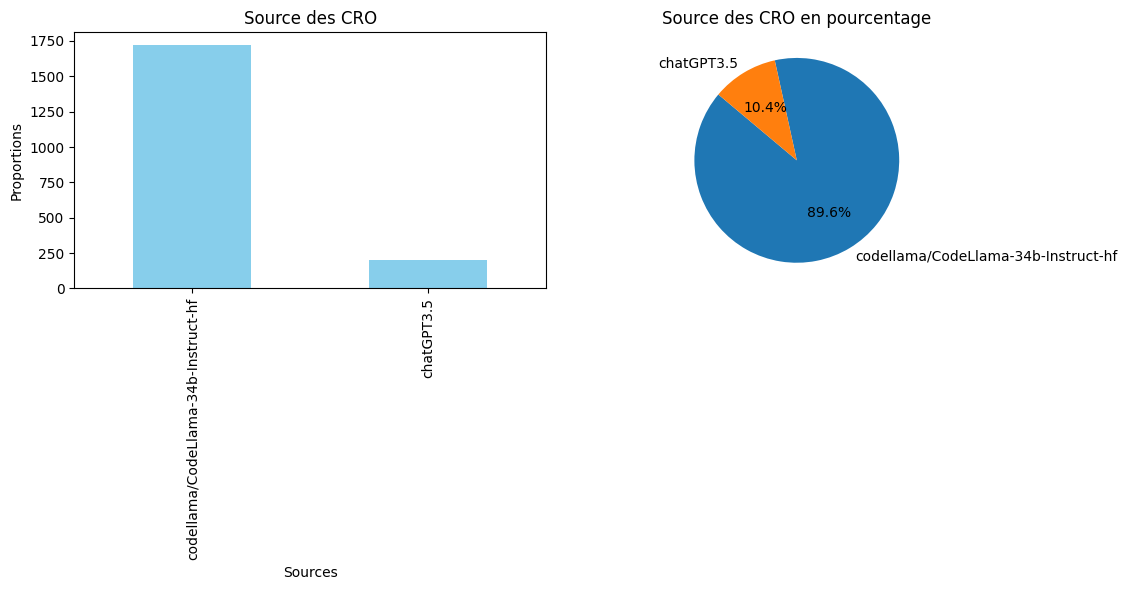

In [14]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_source = df_CRO['source'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_source, labels=value_counts_source.index, autopct='%1.1f%%', startangle=140)
plt.title('Source des CRO en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_source.plot(kind='bar', color='skyblue')
plt.title('Source des CRO')
plt.xlabel('Sources')
plt.ylabel('Proportions')

plt.tight_layout()

Pour que le modèle Spacy puisse être entrainé, une occurence doit impérativement apparaitre au moins une fois dans le dataframe réservé à  l'entrainemenet et dans celui réservé à la validation. Cela est vraie pour toutes les valeurs appartenant aux différents labels d'entité nommée.

## Nb d'occurence anatomopathologiste

In [15]:
print("nb d'anatomopathogiste en référénce:", len(meds))
nb_meds = df_CRO.id_med.unique()
print("nb d'anatomopathologiste qui apparaissent dans les CRO:", len(nb_meds))

nb d'anatomopathogiste en référénce: 100
nb d'anatomopathologiste qui apparaissent dans les CRO: 48


Text(0, 0.5, 'Occurence')

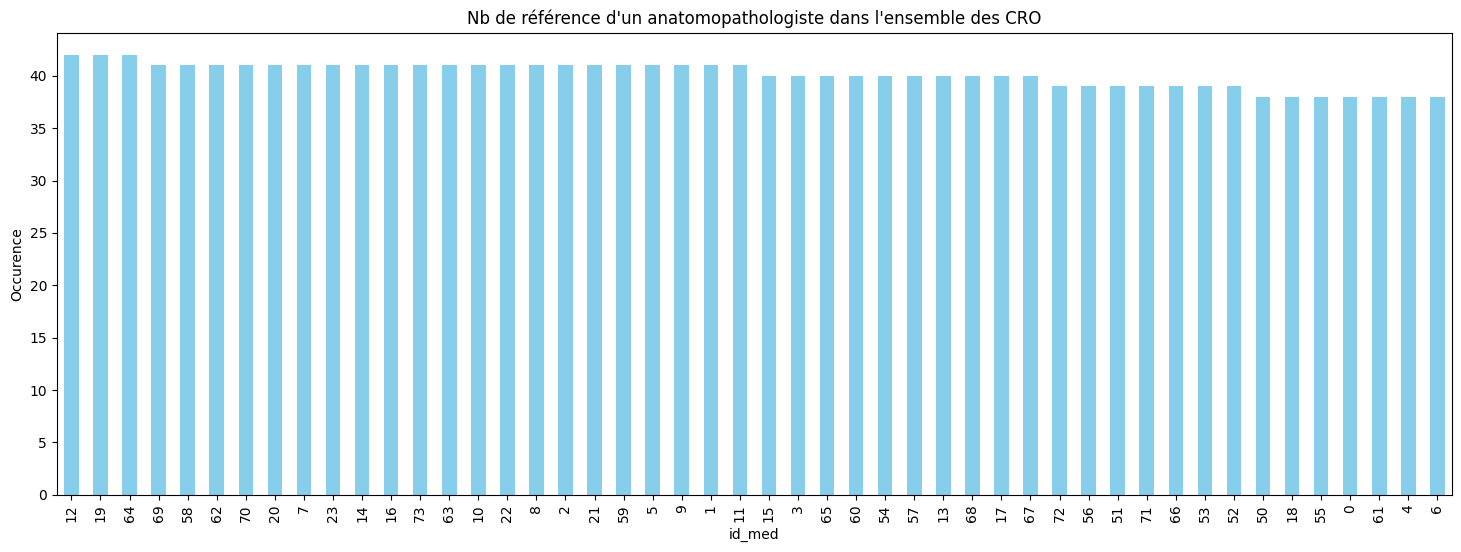

In [16]:
value_counts_med = df_CRO['id_med'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_med.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un anatomopathologiste dans l'ensemble des CRO")
plt.xlabel('id_med')
plt.ylabel('Occurence')

## Nb d'occurence d'un patient

In [17]:
print("nb de patient en référénce:", len(patients))
nb_patients = df_CRO.nir.unique()
print("nb de patient qui apparaissent dans les CRO:", len(nb_patients))

nb de patient en référénce: 400
nb de patient qui apparaissent dans les CRO: 48


Text(0, 0.5, 'Occurence')

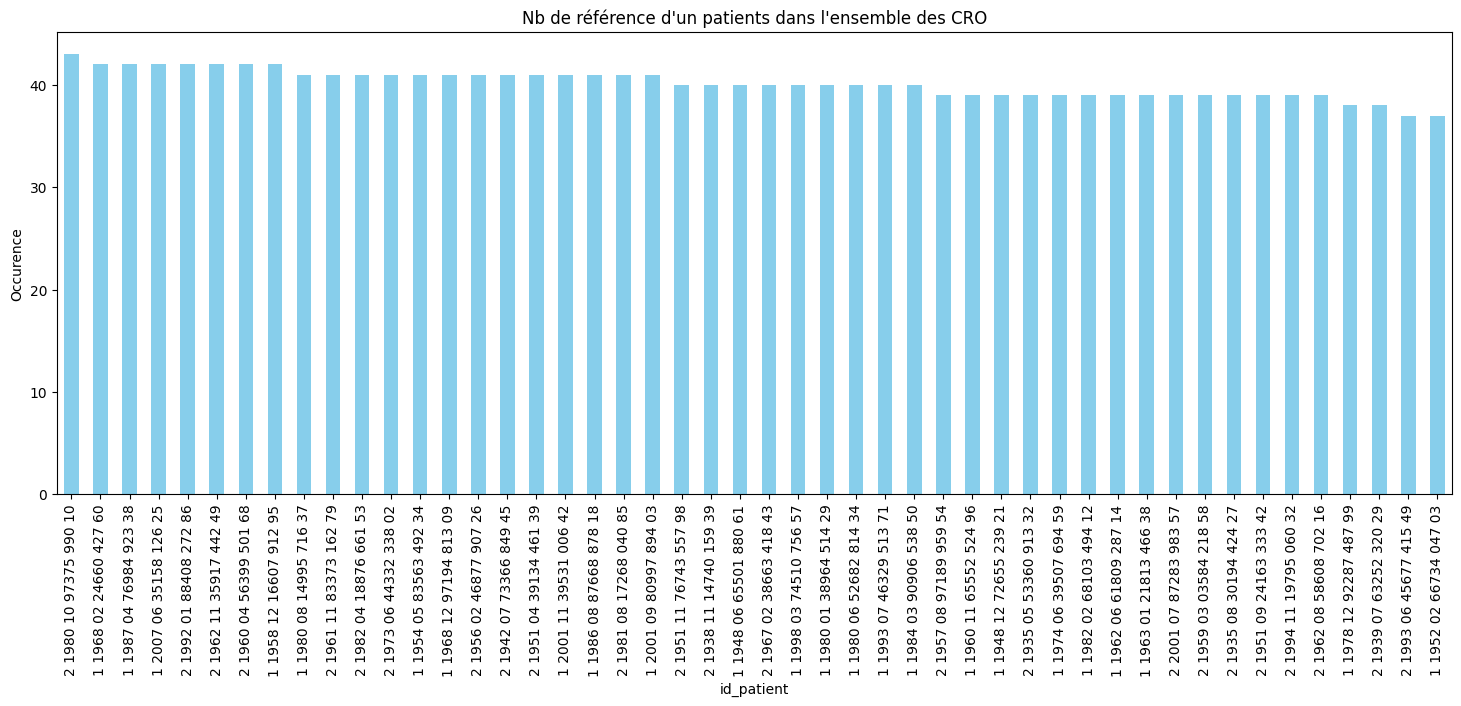

In [18]:
value_counts_patients = df_CRO['nir'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_patients.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un patients dans l'ensemble des CRO")
plt.xlabel('id_patient')
plt.ylabel('Occurence')

## Répartition par organe

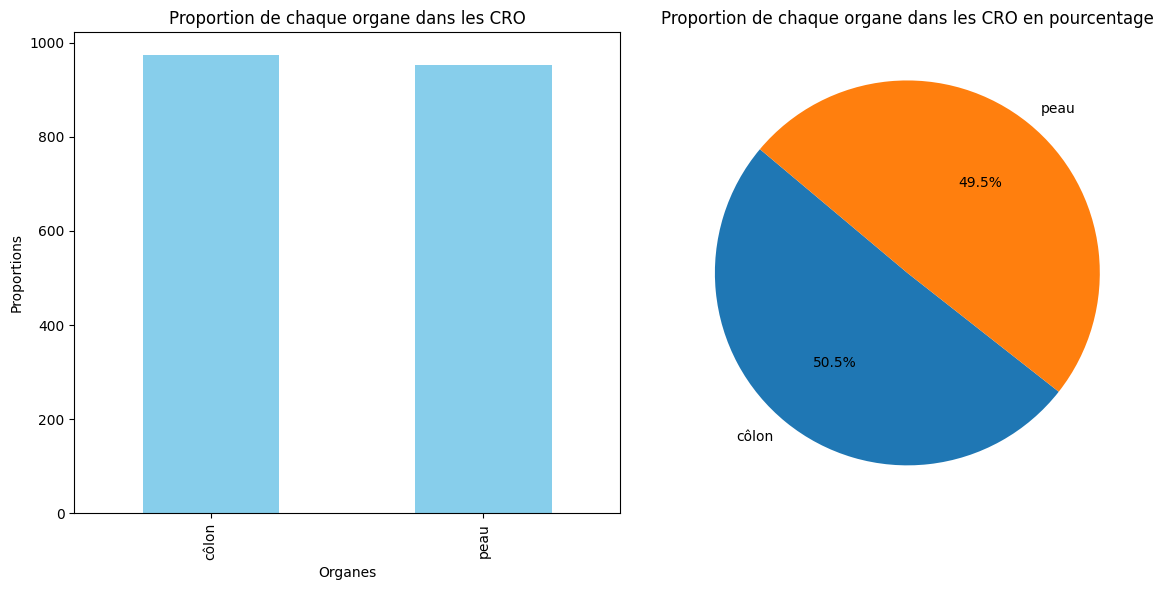

In [19]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_org = df_CRO['organe'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_org, labels=value_counts_org.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion de chaque organe dans les CRO en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_org.plot(kind='bar', color='skyblue')
plt.title('Proportion de chaque organe dans les CRO')
plt.xlabel('Organes')
plt.ylabel('Proportions')

plt.tight_layout()

## Répartition des diagnostics

In [20]:
diags_train_valid = diagnostics.query('organe != "foie"')
print("nb de diagnostics en référence:", len(diags_train_valid))
nb_diags = df_CRO.id_diag.unique()
print("nb de diagnostics qui apparaissent dans les CRO:", len(nb_diags))

nb de diagnostics en référence: 69
nb de diagnostics qui apparaissent dans les CRO: 69


Text(0, 0.5, 'Occurence')

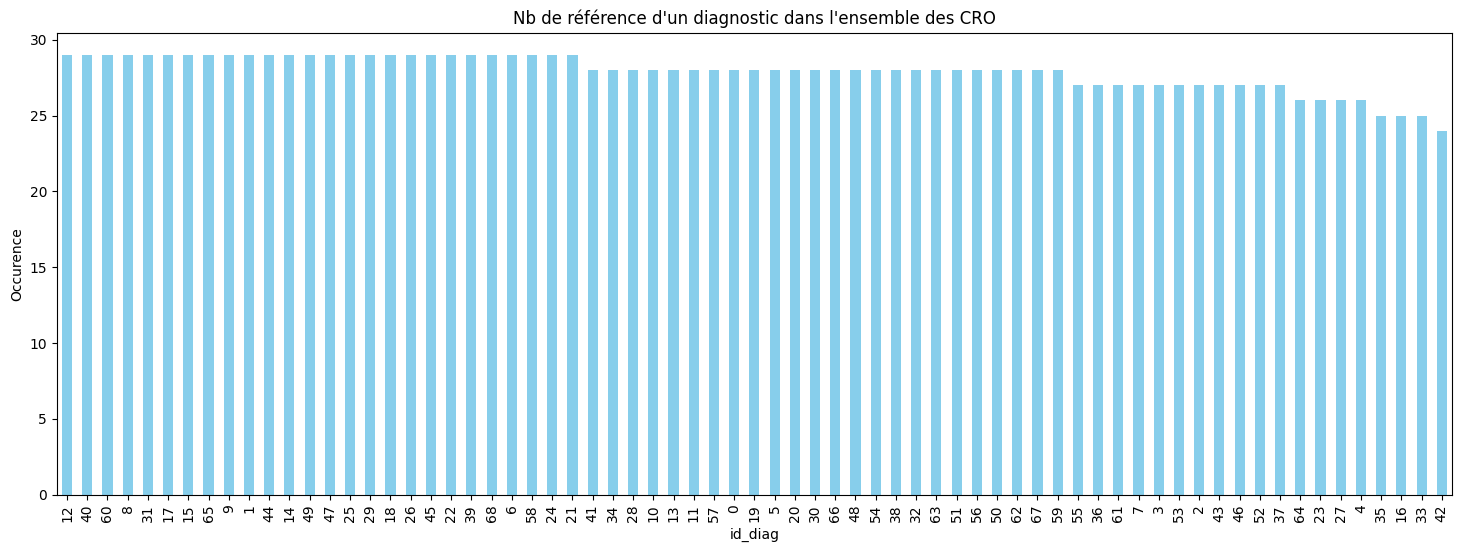

In [21]:
value_counts_diag = df_CRO['id_diag'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_diag.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un diagnostic dans l'ensemble des CRO")
plt.xlabel('id_diag')
plt.ylabel('Occurence')

# Langue et Qualité

## Langue

Lors des expérimentations sur les modèles de huggingchat, et par expérience avec chatGPT, il arrivait que la langue de rédaction change, pour passer subitement à l'anglais. Il fallait conserver que les CRO en français, puisque le diagnostic ne serait pas retrouvé.

In [22]:
from langdetect import detect_langs

def detect_language_proportion(text: str) -> str:
    """
    renvoie les langues détectées avec le pourcentage de confiance
    """
    try:
        lang_proportions = detect_langs(text)
        response = []
        results = {lang.lang: lang.prob for lang in lang_proportions}
        for lang, proportion in results.items():
            response.append(f"{lang}, {round(proportion, 2)}")
        response = '/'.join(response)
        return response
    except:
        return 'pas de langue détectée'

In [23]:
df_CRO_lang = df_CRO.copy(deep=True)

df_CRO_lang['language_proportions'] = df_CRO_lang.CRO.apply(detect_language_proportion)

In [24]:
df_CRO_lang.head(5)

CRO id_diag id_med  \
0  L'examen histopathologique de l'exérèse de pea...      20     72   
1  Centre Hospitalier Universitaire\nService d'An...      60      7   
2  Dr Thierry Foucher\nAnatomopathologiste\nLabor...      20     21   
3  Compte rendu d'histopathologie\n\nNom de l'ana...      61     52   
4  Compte rendu d'histopathologie\n\nPatient:\nNo...      22     65   

                      nir      source   operation      name_patient  \
0  1 1952 02 66734 047 03  chatGPT3.5     exérèse       Luc Gimenez   
1  1 1980 01 38964 514 29  chatGPT3.5     biopsie  Bertrand Lemoine   
2  1 1974 06 39507 694 59  chatGPT3.5     biopsie     Thomas Gérard   
3  1 1980 01 38964 514 29  chatGPT3.5  colectomie  Bertrand Lemoine   
4  1 1986 08 87668 878 18  chatGPT3.5     exérèse      Jean Perrier   

                                             address    birthday  \
0  708, avenue Marine Chartier, 66734 Sainte Camille  18/02/1952   
1               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
2                 7, rue Bertrand Rocher, 39507 Jean  18/06/1974   
3               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
4         13, rue Andrée Pineau, 87668 DelahayeBourg  15/08/1986   

                name_med organe                          diagnostic cancer  \
0  Dr Geneviève Descamps   peau                dermatite péri-orale      0   
1     Dr Olivier Grenier  côlon  tumeur stromale gastro-intestinale      1   
2     Dr Thierry Foucher   peau                dermatite péri-orale      0   
3      Dr Renée Guichard  côlon                    adénome tubuleux      1   
4      Dr Sylvie Nicolas   peau                eczéma dyshidrosique      0   

  language_proportions  
0              fr, 1.0  
1              fr, 1.0  
2              fr, 1.0  
3              fr, 1.0  
4              fr, 1.0

In [25]:
nb_CRO_en = len(df_CRO_lang.query('language_proportions != "fr, 1.0"'))
print('nb de CRO dans une autre langue (complet ou partiel):', nb_CRO_en, 'soit', round(nb_CRO_en * 100 / len(df_CRO)), '% des CRO générés.')

nb de CRO dans une autre langue (complet ou partiel): 14 soit 1 % des CRO générés.


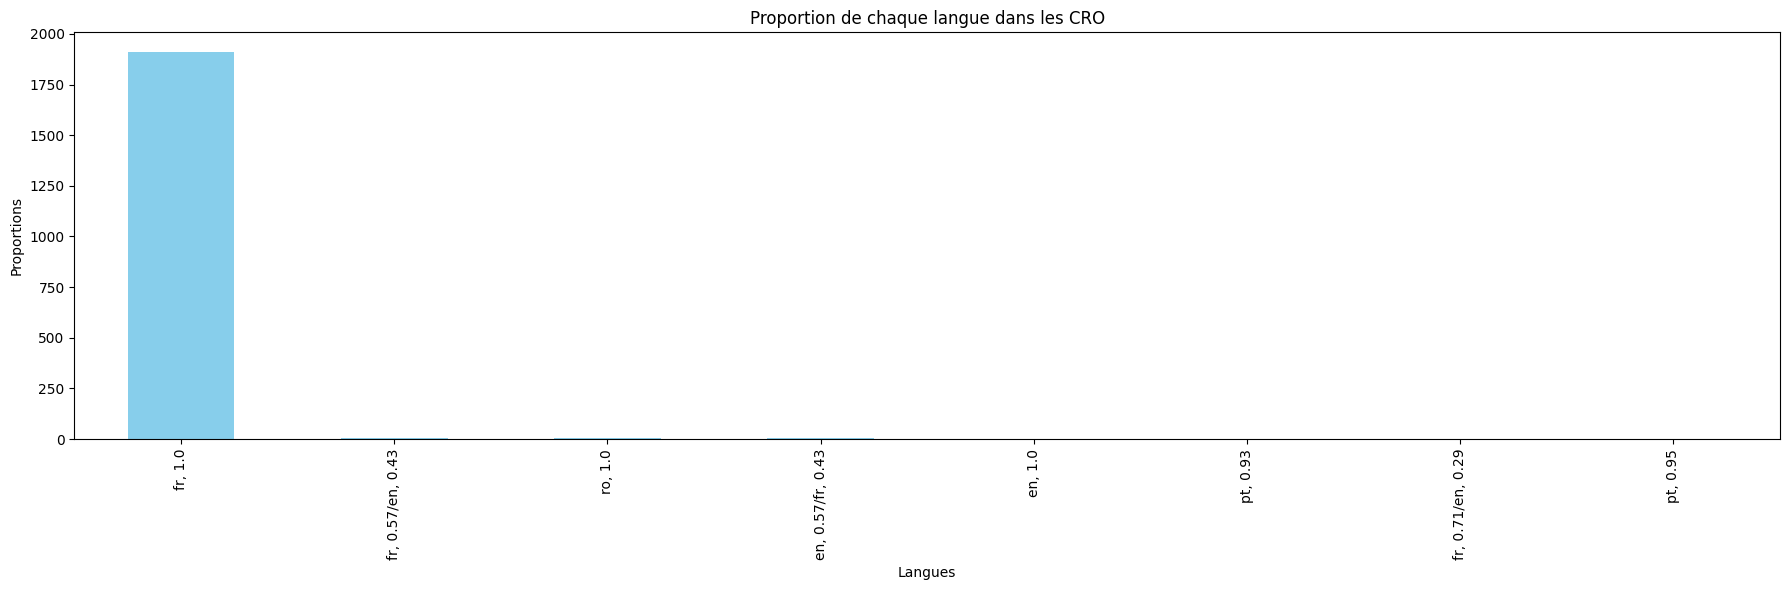

In [26]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_lang = df_CRO_lang['language_proportions'].value_counts()

plt.figure(figsize=(18, 6))

# Créez un graphique en barres
value_counts_lang.plot(kind='bar', color='skyblue')
plt.title('Proportion de chaque langue dans les CRO')
plt.xlabel('Langues')
plt.ylabel('Proportions')

plt.tight_layout()

In [27]:
CRO_non_fr = df_CRO_lang.query('language_proportions != "fr, 1.0"').reset_index()
for index in range(0, len(CRO_non_fr)):
    print(CRO_non_fr.CRO[index], '\n')

Compte Rendu d'Histopathologie - Colectomie de Côlon with Lymphoma for a Single Organ
Introduction
This is a report of an histopathological analysis of a côlon resection performed on March 25th, 2023 at the request of Dr. Jean Dupont. The patient, Marc Thibault, was born on June 4th, 1962 and has been diagnosed with lymphoma affecting one organ. This report will present the results of the histopathological examination of the removed tissue.
Patient Information
Name: Marc Thibault
Date of Birth: June 4th, 1962
Address: 34, Chemin de Henry, 61809 Duhamel
Social Security Number: 1 1962 06 61809 287 14
Clinical Information
The patient was referred to our department due to symptoms of abdominal pain and weight loss. A CT scan revealed a mass in the right hypochondrium, which was suspected to be a tumor. After further evaluation, it was decided that surgery would be necessary to remove the affected organ.
Pathology Report
The specimen consisted of a segmental resection of the right côlon, me

Au vu de la faible quantité de CRO réellement en anglais, les autres sont les CRO non terminés, il n'est pas intéressant de tenter de les récupérer. D'autant plus qu'une autre problème peut se poser, le diagnostic peut se retrouver avec une dénomination différente que celle initialement prévue.

## Qualité

### Nb de mots dans les CRO

Parfois, chatGPT peut se montrer 'faignant' et ne générer que le stric minimum sans le moindre phrase. Pour ne prendre que les CRO dont les diagnostics se trouvent au sein d'une phrase, le nombre de mots est analysé.

In [28]:
def nb_word_in_text(texte: str) -> int:
    try:
        texte_list = texte.split()
        nb_word = len(texte_list)
        return nb_word
    except:
        return 0

In [29]:
df_CRO_lang['nb_word'] = df_CRO_lang.CRO.apply(nb_word_in_text) 

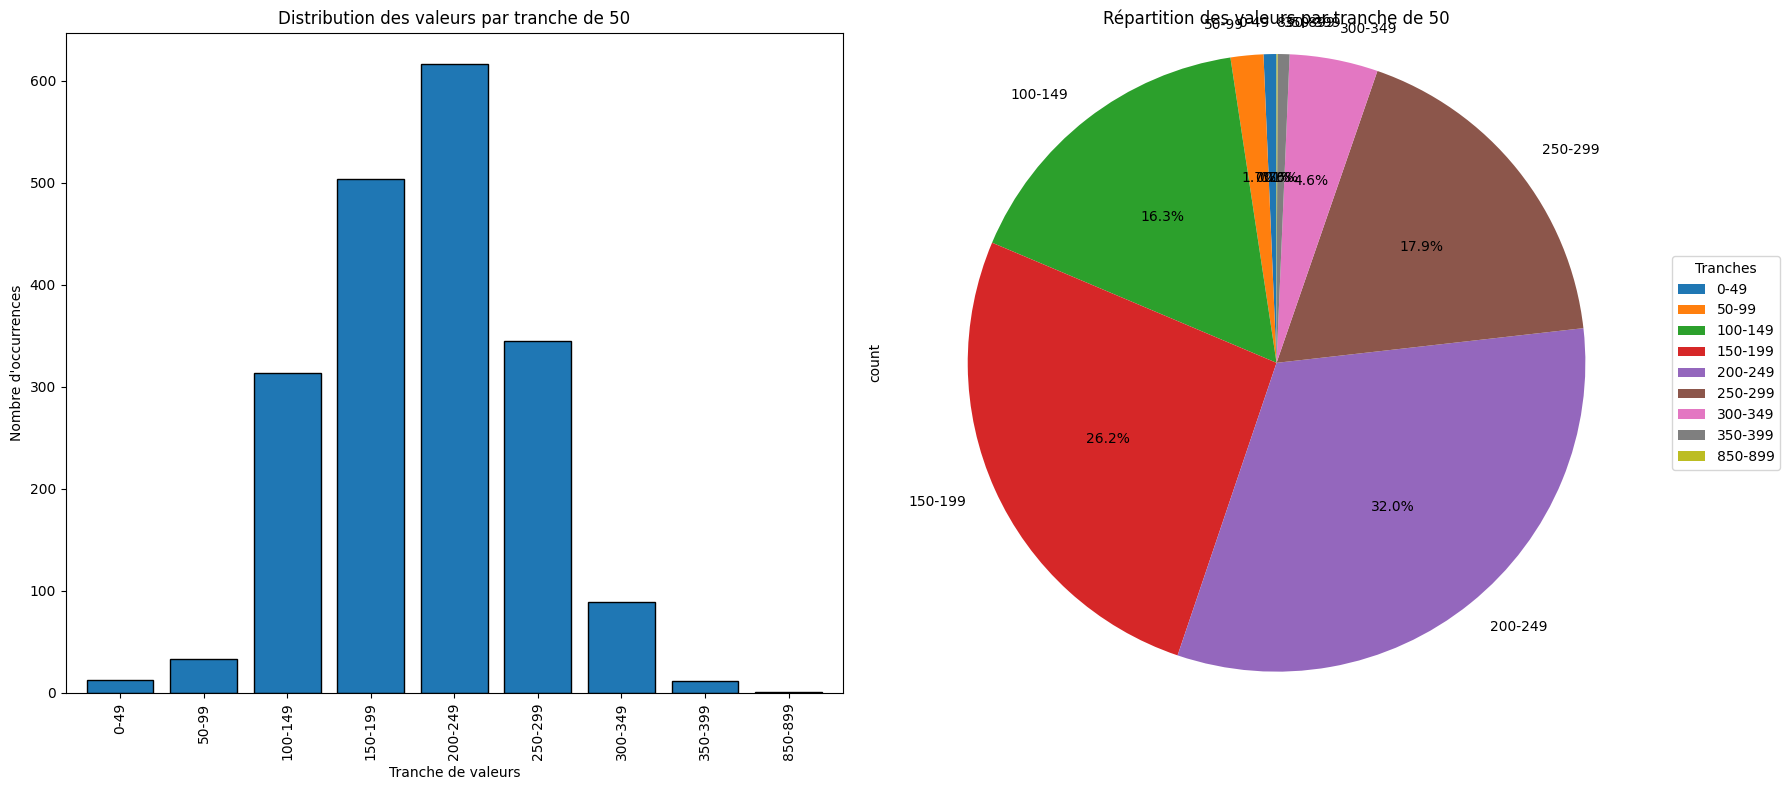

In [30]:
tranche = 50

# Créer des tranches
tranches = [(i, i + tranche - 1) for i in range(0, df_CRO_lang['nb_word'].max(), tranche)]

# Création de la colonne de tranche en utilisant la fonction pd.cut
df_CRO_lang['tranche'] = pd.cut(df_CRO_lang['nb_word'], bins=[i[0] for i in tranches] + [df_CRO_lang['nb_word'].max()], labels=[f"{i[0]}-{i[1]}" for i in tranches])

# Comptage du nombre d'occurrences dans chaque tranche
value_counts_tranches = df_CRO_lang['tranche'].value_counts(sort=False).sort_index()

# Création de la figure et des sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Graphique à barres
value_counts_tranches[value_counts_tranches != 0].plot(kind='bar', edgecolor='black', width=0.8, ax=ax1)
ax1.set_xlabel('Tranche de valeurs')
ax1.set_ylabel('Nombre d\'occurrences')
ax1.set_title(f'Distribution des valeurs par tranche de {tranche}')

# Graphique camembert
value_counts_tranches[value_counts_tranches != 0].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax2)
ax2.axis('equal')  # Assure un camembert circulaire
ax2.set_title(f'Répartition des valeurs par tranche de {tranche}')
ax2.legend(value_counts_tranches[value_counts_tranches != 0].index, title='Tranches', loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustements de la mise en page
plt.tight_layout()

In [31]:
CRO_tranche_query = df_CRO_lang.query('tranche == "800-849"').reset_index()
for index in range(0, len(CRO_tranche_query)):
    print(CRO_tranche_query.CRO[index], '\n')

Les CRO compris entre 0 et 49 mots sont tous ceux qui ne sont pas terminés. Lors de la sélection des CRO en fonction du paramètre de la présence de la note de fin, ces CRO ne seront pas pris en compte. <br>
Les CRO compris entre 50 et 99 mots possèdent une partie des CRO non terminés. Les autres, dans la majorité des cas possèdent une phrase de conclusion possédant le diagnostic, et pas simplement un 'conclusion: diagnostic'.<br>
Le CRO entre 850 et 899 mots, ce dernier ne possèdent pas la note de fin. Il ne fait que répéter des anticorps d'immunohistochimie.<br>
Il n'y a aucun CRO compris entre 400 et 849 mots.

## CRO avec la note de fin 'Ceci est compte-rendu fictif'

Lors des essais de génération de CRO, il est apparu que certain CRO ne se terminait pas. Il s'est alors posé la question de savoir comment déterminer si un CRO était terminé. Pour régler cela, vu dans certain CRO, une note de fin doit apparaitre spécifiant que le compte rendu était fictif.

In [32]:
def CRO_note_valid(CRO: str) -> int:
    CRO_lower = CRO.lower()
    index = CRO_lower.find('ceci est un compte-rendu fictif', 0)
    if index != -1:
        return 1
    else:
        return 0

In [33]:
df_CRO_lang['note_fin'] = df_CRO_lang.CRO.apply(CRO_note_valid)

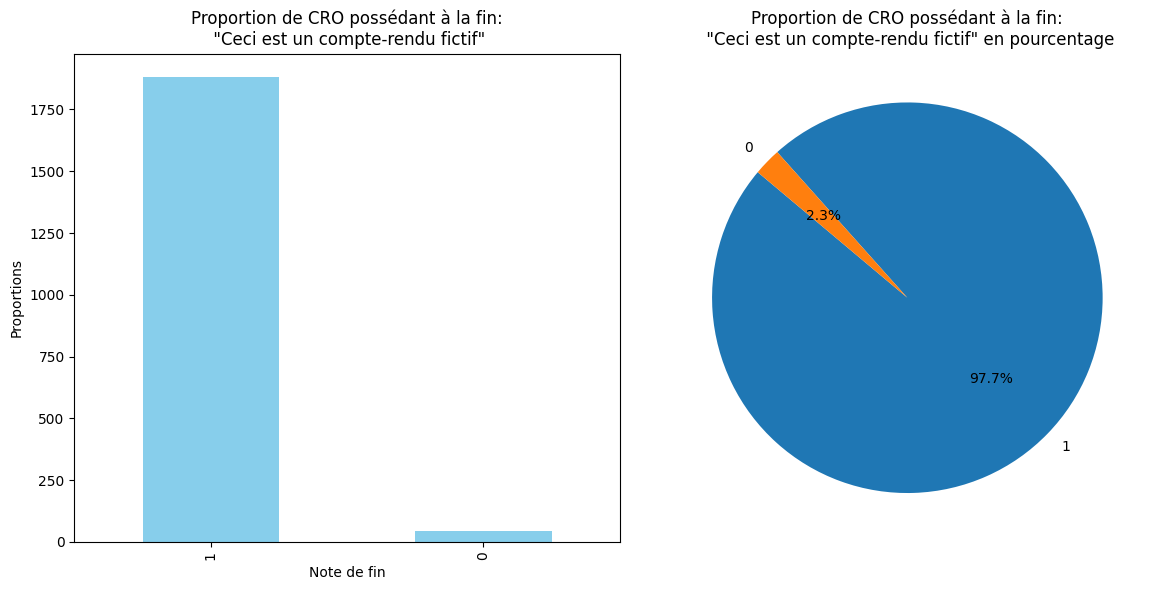

In [34]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_note_fin = df_CRO_lang['note_fin'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_note_fin, labels=value_counts_note_fin.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion de CRO possédant à la fin:\n "Ceci est un compte-rendu fictif" en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_note_fin.plot(kind='bar', color='skyblue')
plt.title('Proportion de CRO possédant à la fin:\n "Ceci est un compte-rendu fictif"')
plt.xlabel('Note de fin')
plt.ylabel('Proportions')

plt.tight_layout()

In [35]:
CRO_note_0 = df_CRO_lang.query('note_fin == 0').reset_index()
for i in range(0, len(CRO_note_0)):
    print(CRO_note_0.CRO[i], '\n')

Compte Rendu d'Histopathologie - Biopsie de Côlon
Nom de l'anatomopathologiste : Dr Inès Cohen
Nom du patient : Susanne Renault
Date de naissance : 31/08/1957
Adresse du patient : 180, avenue de Maréchal, 97189 Ferrand
Numéro de sécurité sociale : 2 1957 08 97189 959 54
Description de la préparation histologique :
La biopsie de côlon a été réalisée sous anesthésie locale. La section transverse de 4 mm de largeur a montré une zone de fibrose de 1 cm de diamallye://afer222\222/ 

Compte Rendu d'Histopathologie
Nom de l'anatomopathologiste : Dr Émilie Baron
Nom du patient : Thomas Gérard
Date de naissance : 18/06/1974
Adresse du patient : 7, rue Bertrand Rocher, 39507 Jean
Numéro de sécurité sociale : 1 1974 e29 e)e
e292\'
2222e222222
2222
2222y
22222222
2222222222
222222222
22222222222222222222222222222
222222222222222222222222222222222222222
2222222222222
222222222222222222222222222222222222222222222222222222222222 

Compte Rendu d'Histopathologie
Nom de l'anatomopathologiste : Dr Olivi

Dans les CRO qui ne possèdent pas de note de fin, plusieurs cas de figures sont présents. Le moment où il se met à répéter toujours le même caractères, ou le même mot, faire une liste de mot (Ac) et passer en anglais.

# Correspondance CRO et datas

In [36]:
df_CRO.head(5)

CRO id_diag id_med  \
0  L'examen histopathologique de l'exérèse de pea...      20     72   
1  Centre Hospitalier Universitaire\nService d'An...      60      7   
2  Dr Thierry Foucher\nAnatomopathologiste\nLabor...      20     21   
3  Compte rendu d'histopathologie\n\nNom de l'ana...      61     52   
4  Compte rendu d'histopathologie\n\nPatient:\nNo...      22     65   

                      nir      source   operation      name_patient  \
0  1 1952 02 66734 047 03  chatGPT3.5     exérèse       Luc Gimenez   
1  1 1980 01 38964 514 29  chatGPT3.5     biopsie  Bertrand Lemoine   
2  1 1974 06 39507 694 59  chatGPT3.5     biopsie     Thomas Gérard   
3  1 1980 01 38964 514 29  chatGPT3.5  colectomie  Bertrand Lemoine   
4  1 1986 08 87668 878 18  chatGPT3.5     exérèse      Jean Perrier   

                                             address    birthday  \
0  708, avenue Marine Chartier, 66734 Sainte Camille  18/02/1952   
1               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
2                 7, rue Bertrand Rocher, 39507 Jean  18/06/1974   
3               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
4         13, rue Andrée Pineau, 87668 DelahayeBourg  15/08/1986   

                name_med organe                          diagnostic cancer  
0  Dr Geneviève Descamps   peau                dermatite péri-orale      0  
1     Dr Olivier Grenier  côlon  tumeur stromale gastro-intestinale      1  
2     Dr Thierry Foucher   peau                dermatite péri-orale      0  
3      Dr Renée Guichard  côlon                    adénome tubuleux      1  
4      Dr Sylvie Nicolas   peau                eczéma dyshidrosique      0

In [37]:
# fonction permettant d'extraire les données des CRO

from datetime import datetime
import locale
# format français pour la date
locale.setlocale(locale.LC_TIME, 'fr_FR')

def trouver_occurrences(texte: str, mot: str) -> int:
    occurrence = []
    index = -1    
    try:
        texte_lower = texte.lower()
        mot_lower = mot.lower()
        while True:
            index = texte_lower.find(mot_lower, index + 1)
            if index == -1:
                break

            occurrence.append(index)
        nb_occurrence = len(occurrence)
        if nb_occurrence >= 1 :
            return nb_occurrence
        else:
            return 0
    except:
        return 0

## Ajout des colonnes vérifiants la présence des données dans les CRO

In [38]:
df_CRO_occurrence = df_CRO_lang.copy(deep=True)

df_CRO_occurrence['nb_diag'] = df_CRO_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['diagnostic']), axis=1)
df_CRO_occurrence['diag_pr'] = df_CRO_occurrence['nb_diag'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_occurrence['nb_med'] = df_CRO_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['name_med']), axis=1)
df_CRO_occurrence['med_pr'] = df_CRO_occurrence['nb_med'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_occurrence['nb_patient'] = df_CRO_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['name_patient']), axis=1)
df_CRO_occurrence['patient_pr'] = df_CRO_occurrence['nb_patient'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_occurrence['nb_birthday'] = df_CRO_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['birthday']), axis=1)
df_CRO_occurrence['birthday_pr'] = df_CRO_occurrence['nb_birthday'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_occurrence['nb_address'] = df_CRO_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['address']), axis=1)
df_CRO_occurrence['address_pr'] = df_CRO_occurrence['nb_address'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_occurrence['nb_nir'] = df_CRO_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['nir']), axis=1)
df_CRO_occurrence['nir_pr'] = df_CRO_occurrence['nb_nir'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_occurrence['note'] = df_CRO_occurrence['diag_pr'] + df_CRO_occurrence['med_pr'] + df_CRO_occurrence['patient_pr'] + df_CRO_occurrence['birthday_pr']\
    + df_CRO_occurrence['address_pr'] + df_CRO_occurrence['nir_pr'] 

In [39]:
df_CRO_occurrence.head(5)

CRO id_diag id_med  \
0  L'examen histopathologique de l'exérèse de pea...      20     72   
1  Centre Hospitalier Universitaire\nService d'An...      60      7   
2  Dr Thierry Foucher\nAnatomopathologiste\nLabor...      20     21   
3  Compte rendu d'histopathologie\n\nNom de l'ana...      61     52   
4  Compte rendu d'histopathologie\n\nPatient:\nNo...      22     65   

                      nir      source   operation      name_patient  \
0  1 1952 02 66734 047 03  chatGPT3.5     exérèse       Luc Gimenez   
1  1 1980 01 38964 514 29  chatGPT3.5     biopsie  Bertrand Lemoine   
2  1 1974 06 39507 694 59  chatGPT3.5     biopsie     Thomas Gérard   
3  1 1980 01 38964 514 29  chatGPT3.5  colectomie  Bertrand Lemoine   
4  1 1986 08 87668 878 18  chatGPT3.5     exérèse      Jean Perrier   

                                             address    birthday  \
0  708, avenue Marine Chartier, 66734 Sainte Camille  18/02/1952   
1               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
2                 7, rue Bertrand Rocher, 39507 Jean  18/06/1974   
3               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
4         13, rue Andrée Pineau, 87668 DelahayeBourg  15/08/1986   

                name_med  ... med_pr nb_patient patient_pr nb_birthday  \
0  Dr Geneviève Descamps  ...      1          1          1           1   
1     Dr Olivier Grenier  ...      1          2          1           1   
2     Dr Thierry Foucher  ...      1          3          1           1   
3      Dr Renée Guichard  ...      1          2          1           1   
4      Dr Sylvie Nicolas  ...      1          1          1           1   

   birthday_pr nb_address  address_pr  nb_nir  nir_pr  note  
0            1          1           1       1       1     6  
1            1          1           1       1       1     6  
2            1          1           1       1       1     6  
3            1          1           1       1       1     6  
4            1          1           1       1       1     6  

[5 rows x 30 columns]

## La présence des diagnostics dans les CRO

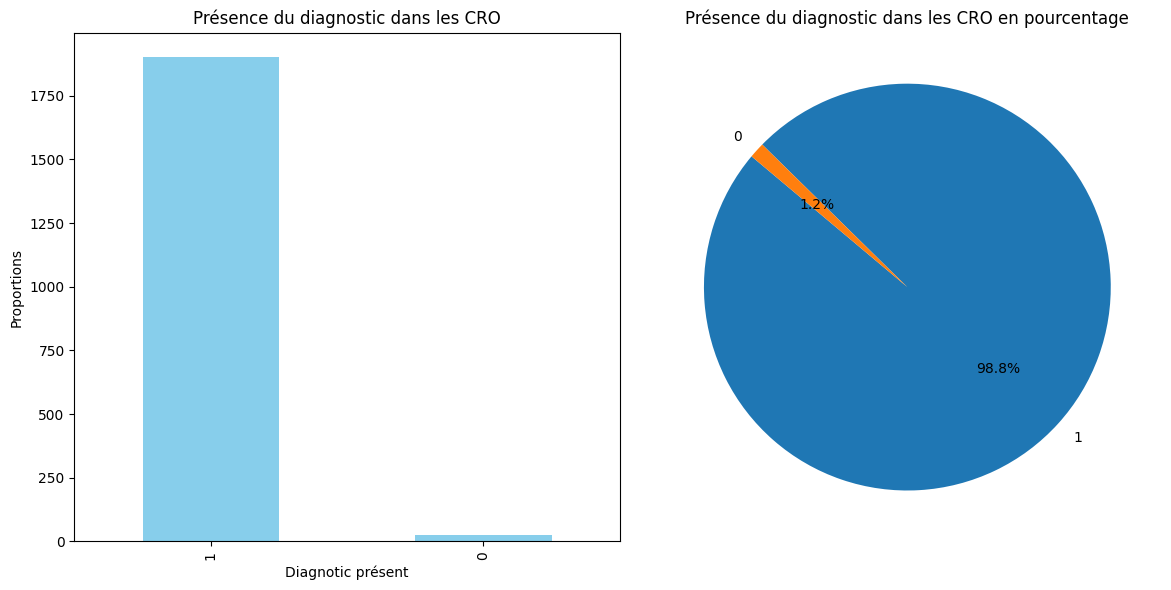

In [40]:
# Présence des diagnostics dans les CRO
value_counts_diag_nb = df_CRO_occurrence['diag_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_diag_nb, labels=value_counts_diag_nb.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence du diagnostic dans les CRO en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_diag_nb.plot(kind='bar', color='skyblue')
plt.title('Présence du diagnostic dans les CRO')
plt.xlabel('Diagnotic présent')
plt.ylabel('Proportions')

plt.tight_layout()

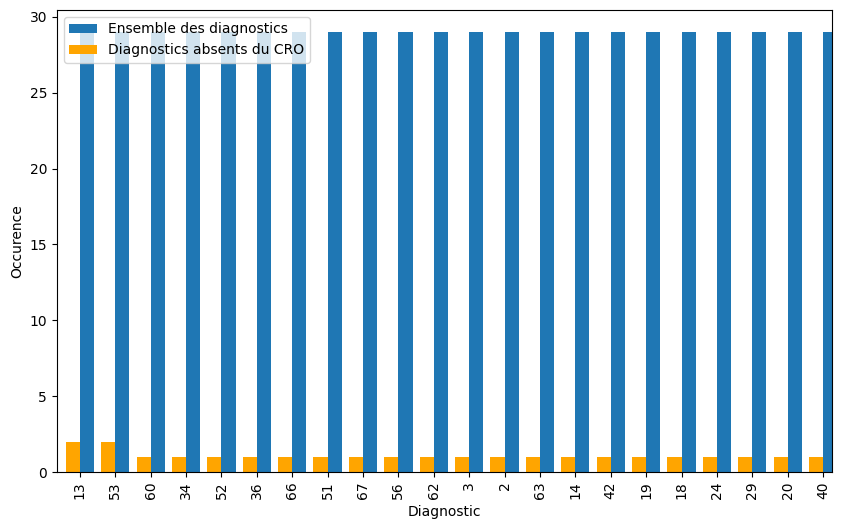

In [41]:
# détermination des diagnostics absents des CRO

diagnostics_absent = df_CRO_occurrence.query('diag_pr == 0')

# Initialisez le graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Graphique de l'ensemble du DataFrame
df_CRO['id_diag'].value_counts().plot(kind='bar', ax=ax, position=0, width=0.4, label='Ensemble des diagnostics')

# Graphique du sous-ensemble filtré
diagnostics_absent['id_diag'].value_counts().plot(kind='bar', ax=ax, position=1, width=0.4, color='orange', label='Diagnostics absents du CRO')
ax.set_xlabel('Diagnostic')
ax.set_ylabel('Occurence')
ax.legend()

In [42]:
diag = '53'
query = f'(id_diag == "{diag}") and (diag_pr == 0)'
sans_diag = df_CRO_occurrence.query(query).index
print(sans_diag)

Index([430, 1019], dtype='int64')


In [43]:
for index in sans_diag:
    CRO_sans_diag = df_CRO_occurrence.query(query).CRO[index]
    print(CRO_sans_diag, '\n')

Compte Rendu d'Histopathologie - Colectomie de Côlon with Lymphoma for a Single Organ
Introduction
This is a report of an histopathological analysis of a côlon resection performed on March 25th, 2023 at the request of Dr. Jean Dupont. The patient, Marc Thibault, was born on June 4th, 1962 and has been diagnosed with lymphoma affecting one organ. This report will present the results of the histopathological examination of the removed tissue.
Patient Information
Name: Marc Thibault
Date of Birth: June 4th, 1962
Address: 34, Chemin de Henry, 61809 Duhamel
Social Security Number: 1 1962 06 61809 287 14
Clinical Information
The patient was referred to our department due to symptoms of abdominal pain and weight loss. A CT scan revealed a mass in the right hypochondrium, which was suspected to be a tumor. After further evaluation, it was decided that surgery would be necessary to remove the affected organ.
Pathology Report
The specimen consisted of a segmental resection of the right côlon, me

Dans les cas où le diagnostic n'était pas présent dans le CRO, il apparait que cela est dû à une faute d'orthographe, ou un nom alternatif à la maladie, voir l'utilisation d'un acronyme. Pour réduire cette quantité de CRO non validé, il a fallut remplacer le diagnostic erroné par le bonne orthographe.

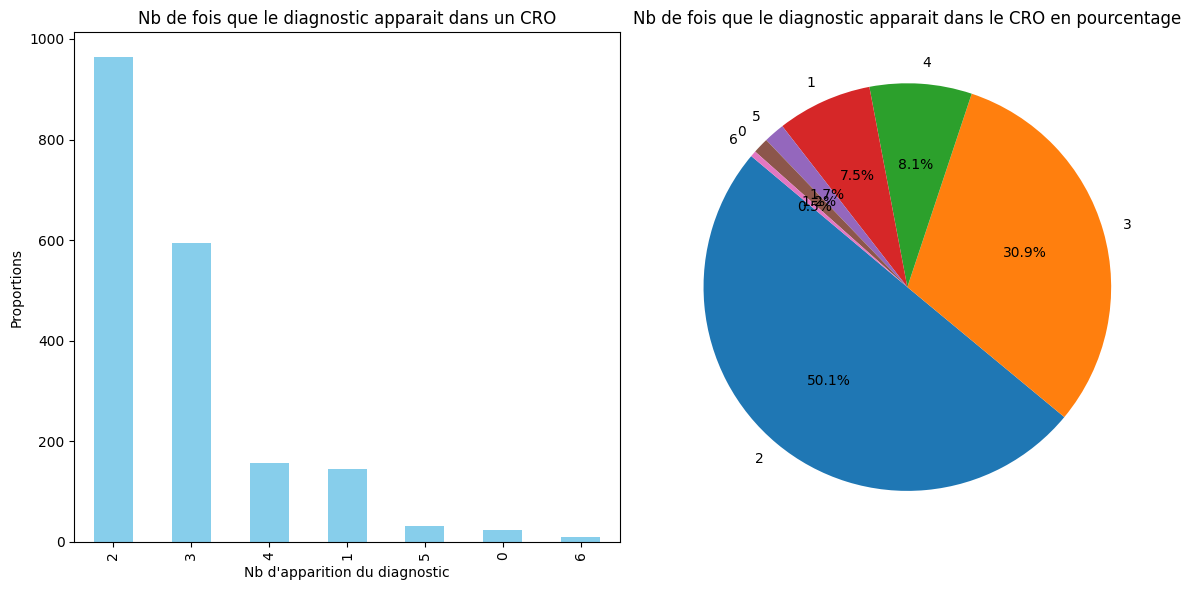

In [44]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_diag_occ = df_CRO_occurrence['nb_diag'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_diag_occ, labels=value_counts_diag_occ.index, autopct='%1.1f%%', startangle=140)
plt.title("Nb de fois que le diagnostic apparait dans le CRO en pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_diag_occ.plot(kind='bar', color='skyblue')
plt.title("Nb de fois que le diagnostic apparait dans un CRO")
plt.xlabel("Nb d'apparition du diagnostic")
plt.ylabel('Proportions')

plt.tight_layout()

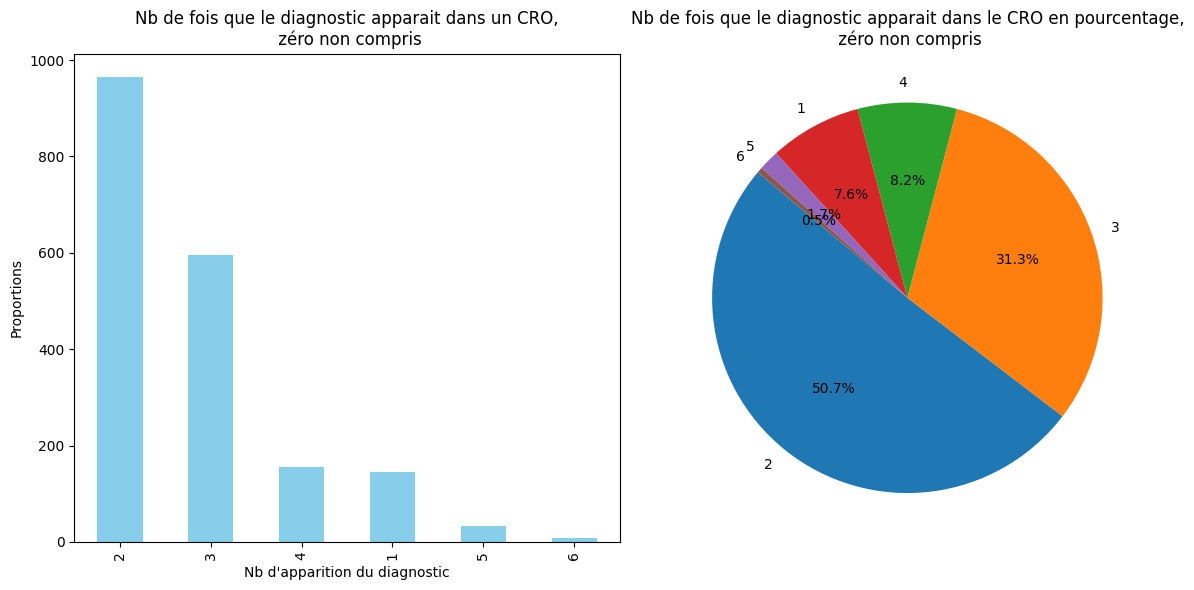

In [45]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_diag_occ_sans_med = df_CRO_occurrence.query('nb_diag != 0')['nb_diag'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_diag_occ_sans_med, labels=value_counts_diag_occ_sans_med.index, autopct='%1.1f%%', startangle=140)
plt.title("Nb de fois que le diagnostic apparait dans le CRO en pourcentage,\n zéro non compris")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_diag_occ_sans_med.plot(kind='bar', color='skyblue')
plt.title("Nb de fois que le diagnostic apparait dans un CRO,\n zéro non compris")
plt.xlabel("Nb d'apparition du diagnostic")
plt.ylabel('Proportions')

plt.tight_layout()

In [46]:
CRO_occ_query = df_CRO_occurrence.query('nb_diag == 6').reset_index()
for index in range(0, len(CRO_occ_query)):
    print(CRO_occ_query.CRO[index], '\n')

Compte rendu d'histopathologie

Patient:
Nom: Marc Thibault
Date de naissance: 04/06/1962
Adresse: 34, chemin de Henry, 61809 Duhamel
Numéro de sécurité sociale: 1 1962 06 61809 287 14

Anatomopathologiste:
Dr Sylvie Nicolas

Échantillon:
Type: Biopsie de peau
Dimensions: Fictives

Résultats de l'analyse histopathologique:

Le présent échantillon de biopsie de peau a été examiné au microscope par le Dr Sylvie Nicolas, anatomopathologiste. Les résultats révèlent la présence d'un mélanome.

Le mélanome est une forme maligne de cancer de la peau qui se développe à partir des cellules appelées mélanocytes, responsables de la production de mélanine. Dans le cas du patient Marc Thibault, ce mélanome est localisé au niveau de la peau.

Le mélanome présent dans cet échantillon est caractérisé par une prolifération anormale de cellules mélanocytaires. Ces cellules présentent une forme irrégulière, une augmentation de leur taille et une augmentation marquée de la coloration mélanique.

Le diagno

## La présence de l'anatomopathologiste dans le CRO

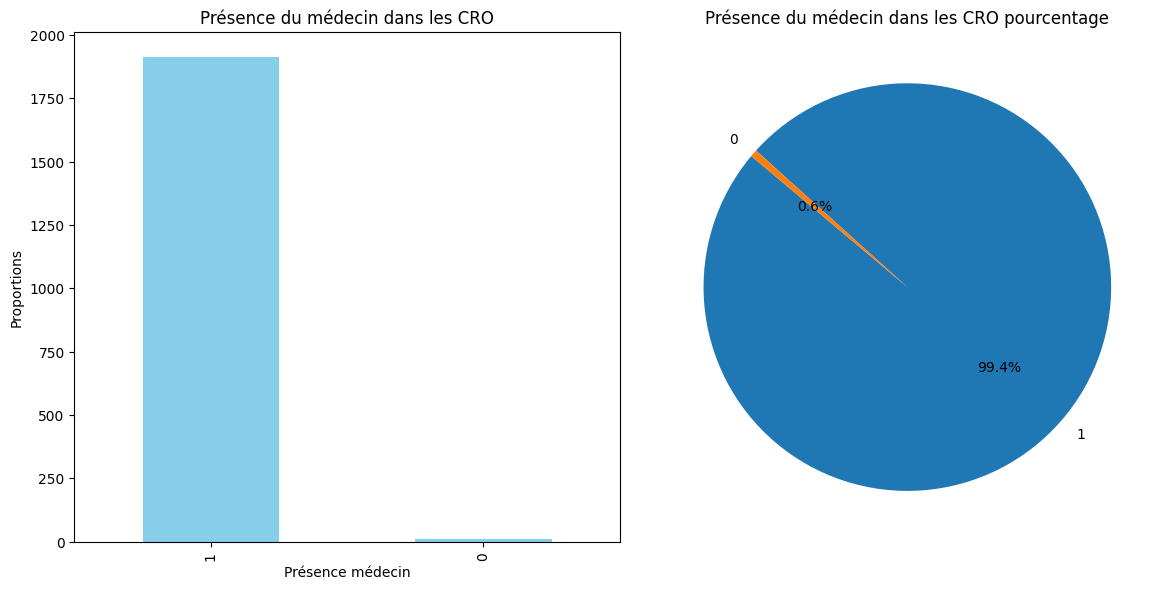

In [47]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_med_pr = df_CRO_occurrence['med_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_med_pr, labels=value_counts_med_pr.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence du médecin dans les CRO pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_med_pr.plot(kind='bar', color='skyblue')
plt.title('Présence du médecin dans les CRO')
plt.xlabel('Présence médecin')
plt.ylabel('Proportions')

plt.tight_layout()

In [48]:
index_sans_med = df_CRO_occurrence.query('med_pr == 0').index
for index in index_sans_med:
    print('médecin', df_CRO_occurrence.name_med[index], index)
    print(df_CRO_occurrence.CRO[index], '\n')

médecin Dr Olivier Grenier 302
Compte Rendu d'Histopathologie
Nom de l'anatomopatholog 

médecin Dr Martine Normand 430
Compte Rendu d'Histopathologie - Colectomie de Côlon with Lymphoma for a Single Organ
Introduction
This is a report of an histopathological analysis of a côlon resection performed on March 25th, 2023 at the request of Dr. Jean Dupont. The patient, Marc Thibault, was born on June 4th, 1962 and has been diagnosed with lymphoma affecting one organ. This report will present the results of the histopathological examination of the removed tissue.
Patient Information
Name: Marc Thibault
Date of Birth: June 4th, 1962
Address: 34, Chemin de Henry, 61809 Duhamel
Social Security Number: 1 1962 06 61809 287 14
Clinical Information
The patient was referred to our department due to symptoms of abdominal pain and weight loss. A CT scan revealed a mass in the right hypochondrium, which was suspected to be a tumor. After further evaluation, it was decided that surgery would be necessa

De même que pour l'absence de diagnostic, cela est dû à des erreurs d'orthographe ou une inversion entre le nom et le prénom.

## La présence du patient dans le CRO

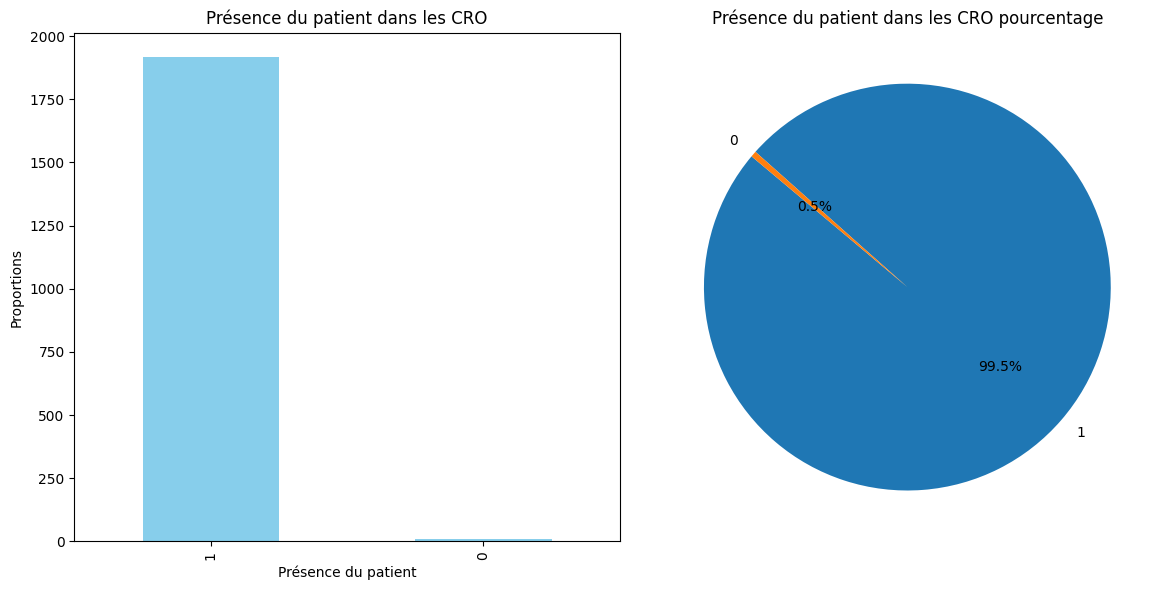

In [49]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_patient_pr = df_CRO_occurrence['patient_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_patient_pr, labels=value_counts_patient_pr.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence du patient dans les CRO pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_patient_pr.plot(kind='bar', color='skyblue')
plt.title('Présence du patient dans les CRO')
plt.xlabel('Présence du patient')
plt.ylabel('Proportions')

plt.tight_layout()

In [50]:
index_CRO_sans_patient = df_CRO_occurrence.query('patient_pr == 0').index
for index in index_CRO_sans_patient:
    print(index)
    print(df_CRO_occurrence.CRO[index], '\n')

302
Compte Rendu d'Histopathologie
Nom de l'anatomopatholog 

499
Comp 

510
Compte 

616
Compte Rend 

1033
Compte Rendu 

1201
Compte R 

1254
Compte Rendu d'Histopathologie 

1476
Compte 

1858
Comp 



Idem que pour la détection des anatomopathologistes.

## La présence de la date de naissance dans les CRO

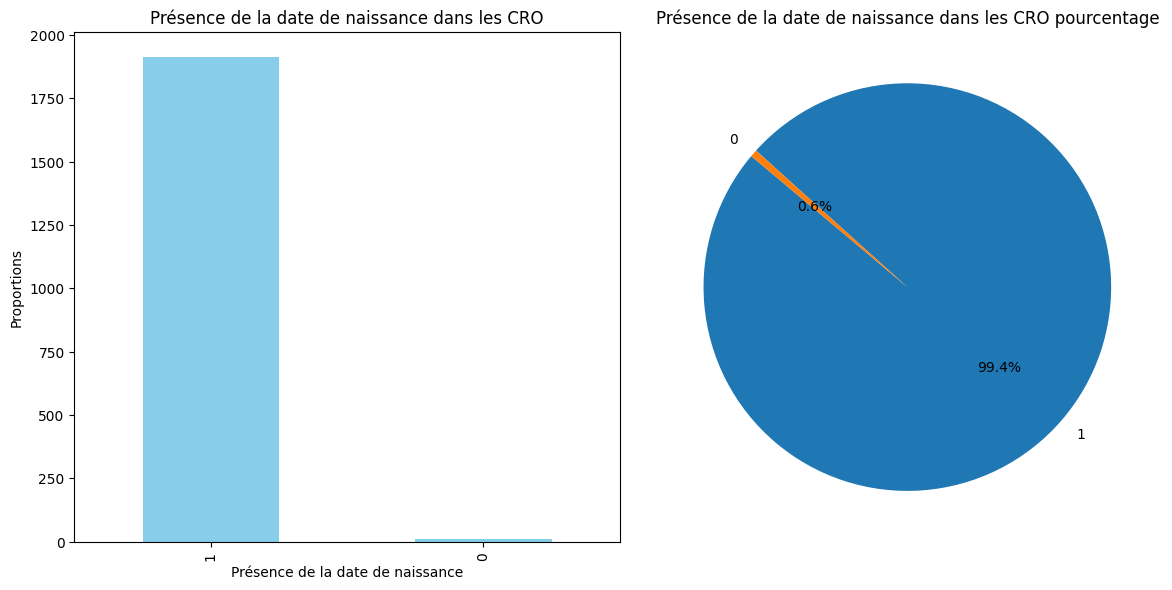

In [51]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_date_pr = df_CRO_occurrence['birthday_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_date_pr, labels=value_counts_date_pr.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence de la date de naissance dans les CRO pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_date_pr.plot(kind='bar', color='skyblue')
plt.title('Présence de la date de naissance dans les CRO')
plt.xlabel('Présence de la date de naissance')
plt.ylabel('Proportions')

plt.tight_layout()

In [52]:
index_CRO_sans_date = df_CRO_occurrence.query('birthday_pr == 0').index
for index in index_CRO_sans_date:
    print(index)
    print(df_CRO_occurrence.CRO[index], '\n')

302
Compte Rendu d'Histopathologie
Nom de l'anatomopatholog 

430
Compte Rendu d'Histopathologie - Colectomie de Côlon with Lymphoma for a Single Organ
Introduction
This is a report of an histopathological analysis of a côlon resection performed on March 25th, 2023 at the request of Dr. Jean Dupont. The patient, Marc Thibault, was born on June 4th, 1962 and has been diagnosed with lymphoma affecting one organ. This report will present the results of the histopathological examination of the removed tissue.
Patient Information
Name: Marc Thibault
Date of Birth: June 4th, 1962
Address: 34, Chemin de Henry, 61809 Duhamel
Social Security Number: 1 1962 06 61809 287 14
Clinical Information
The patient was referred to our department due to symptoms of abdominal pain and weight loss. A CT scan revealed a mass in the right hypochondrium, which was suspected to be a tumor. After further evaluation, it was decided that surgery would be necessary to remove the affected organ.
Pathology Report
The 

Pour la date de naissance, elle pouvait apparaitre sous la forme anglaise (MM/JJ/AAAA) ou bien écrite en toutes lettres (français et anglais).

## La présence de l'adresse du patient dans les CRO

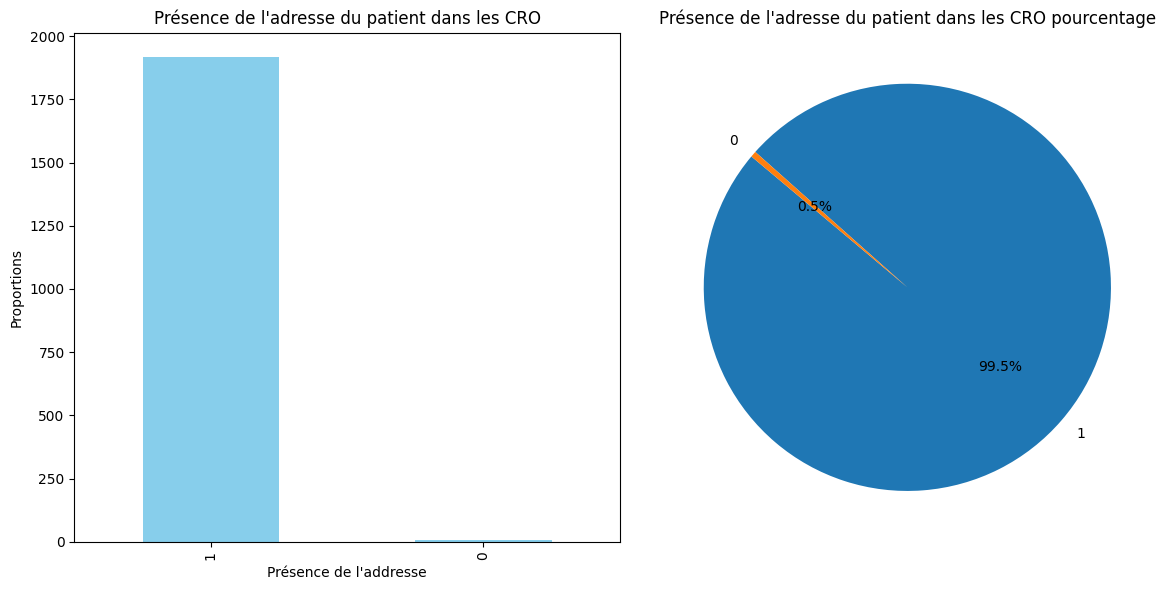

In [53]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_address_pr = df_CRO_occurrence['address_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_address_pr, labels=value_counts_address_pr.index, autopct='%1.1f%%', startangle=140)
plt.title("Présence de l'adresse du patient dans les CRO pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_address_pr.plot(kind='bar', color='skyblue')
plt.title("Présence de l'adresse du patient dans les CRO")
plt.xlabel("Présence de l'addresse")
plt.ylabel('Proportions')

plt.tight_layout()

In [54]:
index_CRO_sans_address = df_CRO_occurrence.query('address_pr == 0').index
for index in index_CRO_sans_address:
    print(index)
    print(df_CRO_occurrence.CRO[index], '\n')

302
Compte Rendu d'Histopathologie
Nom de l'anatomopatholog 

499
Comp 

510
Compte 

616
Compte Rend 

1033
Compte Rendu 

1201
Compte R 

1254
Compte Rendu d'Histopathologie 

1476
Compte 

1858
Comp 



Pour les rares cas ou l'adresse était manquante, cela était dû au fait que le CRO ne présentait que la ville, mais pas le code postal, de même pour le num et nom de la rue/boulevard/... 

## Note finale

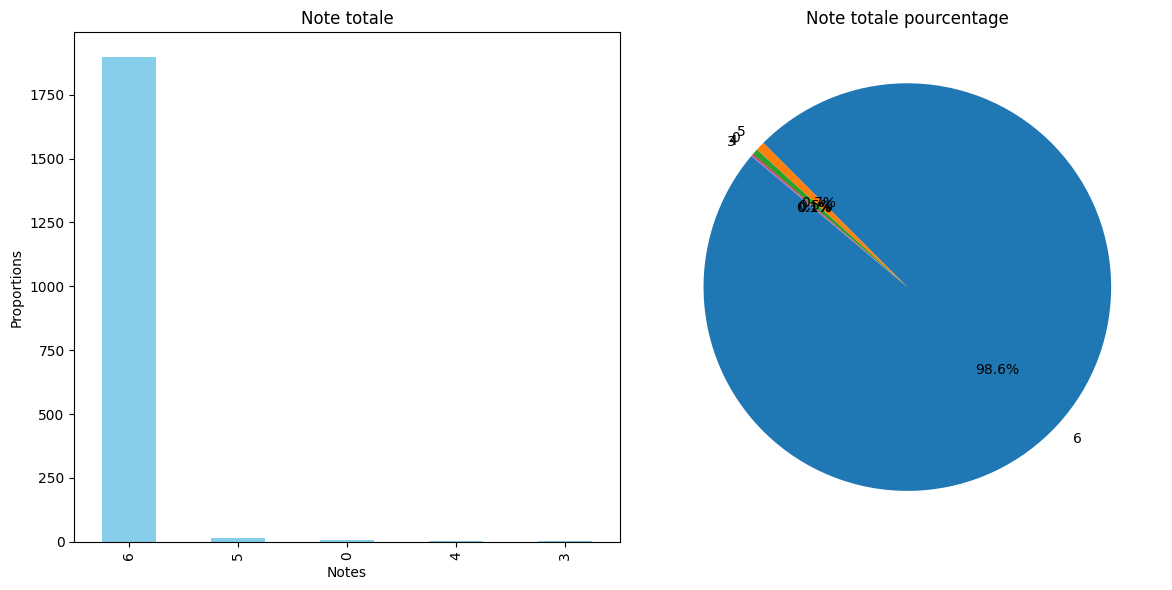

In [55]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_note = df_CRO_occurrence['note'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_note, labels=value_counts_note.index, autopct='%1.1f%%', startangle=140)
plt.title("Note totale pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_note.plot(kind='bar', color='skyblue')
plt.title("Note totale")
plt.xlabel('Notes')
plt.ylabel('Proportions')

plt.tight_layout()

Après avoir récupéré manuellement les CRO sur lequel il manquait une ou plusieurs donné, il ne reste que 1,3 % des CRO invalides.

# Répartition en type de prélèvement

In [56]:
df_CRO_type = df_CRO_occurrence.copy(deep=True)

In [57]:
df_CRO_type['operation'].unique()

array(['exérèse', 'biopsie', 'colectomie'], dtype=object)

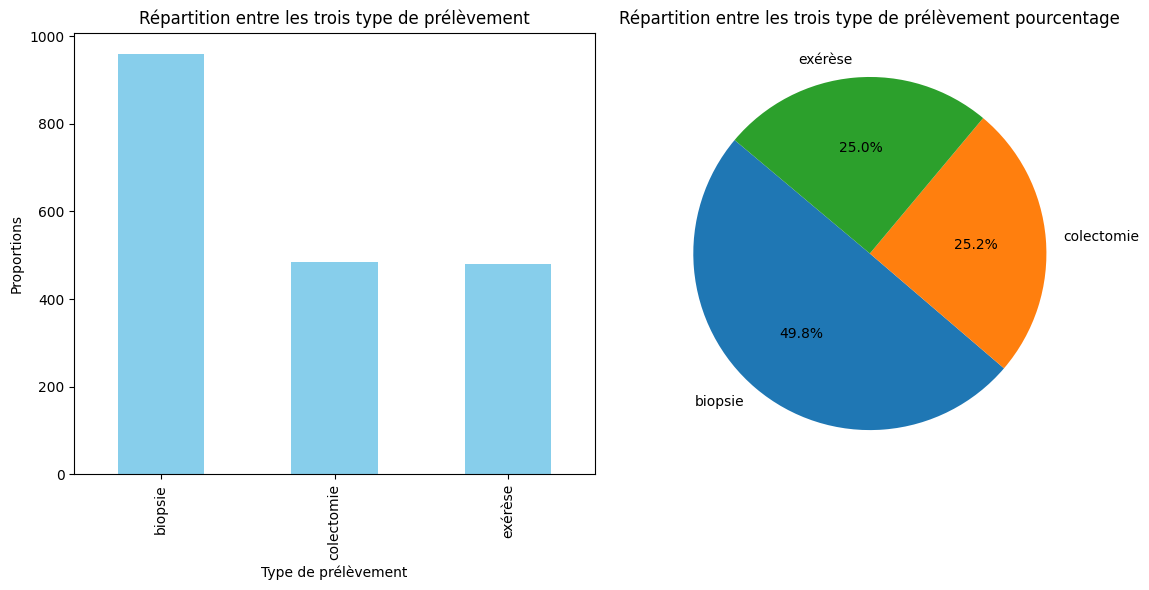

In [58]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_type = df_CRO_type['operation'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_type, labels=value_counts_type.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition entre les trois type de prélèvement pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_type.plot(kind='bar', color='skyblue')
plt.title("Répartition entre les trois type de prélèvement")
plt.xlabel('Type de prélèvement')
plt.ylabel('Proportions')

plt.tight_layout()

# CRO valides

## Filtration vis à vis des différents paramètres d'un CRO valide

### La langue

Lors de l'EDA, il apparait que certain CRO ne sont pas en français, ou pas entièrement. Ainsi pour s'assurer que notre modèle Spacy s'entraine correctement, seuls les CRO indiqués comme fr, 1.0 sont conservés.

In [59]:
df_CRO_lang.head(5)

CRO id_diag id_med  \
0  L'examen histopathologique de l'exérèse de pea...      20     72   
1  Centre Hospitalier Universitaire\nService d'An...      60      7   
2  Dr Thierry Foucher\nAnatomopathologiste\nLabor...      20     21   
3  Compte rendu d'histopathologie\n\nNom de l'ana...      61     52   
4  Compte rendu d'histopathologie\n\nPatient:\nNo...      22     65   

                      nir      source   operation      name_patient  \
0  1 1952 02 66734 047 03  chatGPT3.5     exérèse       Luc Gimenez   
1  1 1980 01 38964 514 29  chatGPT3.5     biopsie  Bertrand Lemoine   
2  1 1974 06 39507 694 59  chatGPT3.5     biopsie     Thomas Gérard   
3  1 1980 01 38964 514 29  chatGPT3.5  colectomie  Bertrand Lemoine   
4  1 1986 08 87668 878 18  chatGPT3.5     exérèse      Jean Perrier   

                                             address    birthday  \
0  708, avenue Marine Chartier, 66734 Sainte Camille  18/02/1952   
1               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
2                 7, rue Bertrand Rocher, 39507 Jean  18/06/1974   
3               96, rue Honoré Hoareau, 38964 Delmas  10/01/1980   
4         13, rue Andrée Pineau, 87668 DelahayeBourg  15/08/1986   

                name_med organe                          diagnostic cancer  \
0  Dr Geneviève Descamps   peau                dermatite péri-orale      0   
1     Dr Olivier Grenier  côlon  tumeur stromale gastro-intestinale      1   
2     Dr Thierry Foucher   peau                dermatite péri-orale      0   
3      Dr Renée Guichard  côlon                    adénome tubuleux      1   
4      Dr Sylvie Nicolas   peau                eczéma dyshidrosique      0   

  language_proportions  nb_word  tranche  note_fin  
0              fr, 1.0      146  100-149         1  
1              fr, 1.0      144  100-149         1  
2              fr, 1.0      267  250-299         1  
3              fr, 1.0      113  100-149         1  
4              fr, 1.0      194  150-199         1

In [60]:
df_CRO_filtre_1 = df_CRO_type.query('language_proportions == "fr, 1.0"')
print('Taille originale du df CRO:', len(df_CRO_type), 'CRO,')
print('taille après filtrage de la langue (fr 100%):', len(df_CRO_filtre_1), 'CRO,')
print('soit une perte de', round((len(df_CRO_type) - len(df_CRO_filtre_1)) * 100 / len(df_CRO_type), 2), '%.')

Taille originale du df CRO: 1926 CRO,
taille après filtrage de la langue (fr 100%): 1912 CRO,
soit une perte de 0.73 %.


### La présence de toutes les données

Pour l'entrainement de Spacy, il faut déterminer les index des entitées recherchées dans les CRO. Pour certain, ils sont simplement absent, car la génération de la réponse s'est stoppée trop tôt, pour d'autres, c'est la langue, mais le filtre précédent résout ce problème. Ainsi, seuls les CRO ayant une note de 6, qui correspont aux différentes entitées qui seront recherchés, sont conservés.

In [61]:
df_CRO_filtre_2 = df_CRO_filtre_1.query('note == 6')
print('Taille après filtrage de la note (6/6):', len(df_CRO_filtre_2), 'CRO,')
print('soit une perte de', round((len(df_CRO_type) - len(df_CRO_filtre_2)) * 100 / len(df_CRO_type), 2), '% par rapport au df sans filtre.')

Taille après filtrage de la note (6/6): 1896 CRO,
soit une perte de 1.56 % par rapport au df sans filtre.


### La présence de la note de fin

In [62]:
df_CRO_filtre_3 = df_CRO_filtre_2.query('note_fin == 1')
print('Taille après filtrage de la présence de la note de fin:', len(df_CRO_filtre_3), 'CRO,')
print('soit une perte de', round((len(df_CRO_type) - len(df_CRO_filtre_3)) * 100 / len(df_CRO_type), 2), '% par rapport au df sans filtre.')

Taille après filtrage de la présence de la note de fin: 1875 CRO,
soit une perte de 2.65 % par rapport au df sans filtre.


In [63]:
df_CRO_filtre_3_reinit = df_CRO_filtre_3.reset_index(drop=True)
for index in range(0, len(df_CRO_filtre_3_reinit) -1):
    print(df_CRO_filtre_3_reinit.CRO[index], '\n')

L'examen histopathologique de l'exérèse de peau provenant de M. Luc Gimenez, âgé de 72 ans, né le 18/02/1952 et résidant au 708, avenue Marine Chartier, 66734 Sainte Camille, a révélé une dermatite péri-orale. 

Les dimensions de l'échantillon prélevé sont fictives et ne sont pas mentionnées dans le texte.

Le prélèvement histologique montre une épidermie avec une hyperkératose et une acanthose modérées. On observe également un infiltrat inflammatoire dense, constitué principalement de lymphocytes, confiné dans le derme superficiel. Des foyers de néutrophiles sont également présents au niveau de l'infiltrat inflammatoire.

Dans le derme profond, on observe une légère dilatation et une hyperplasie des petits vaisseaux sanguins. Les glandes sébacées ne présentent pas d'anomalies significatives.

L'ensemble des caractéristiques histologiques observées est compatible avec un diagnostic de dermatite péri-orale.

Anatomopathologiste: Dr Geneviève Descamps
Numéro de sécurité sociale: 1 1952 0

# EDA après filtration

## La source (après filtration)

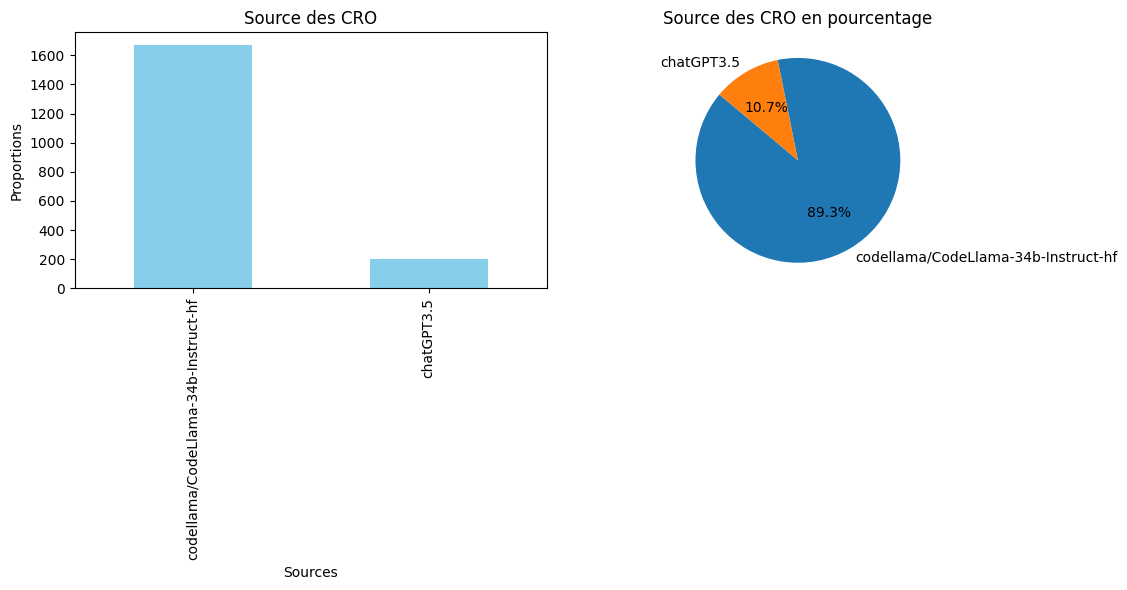

In [64]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts = df_CRO_filtre_3_reinit['source'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Source des CRO en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts.plot(kind='bar', color='skyblue')
plt.title('Source des CRO')
plt.xlabel('Sources')
plt.ylabel('Proportions')

plt.tight_layout()

## Le type de prélèvement (après filtrage)

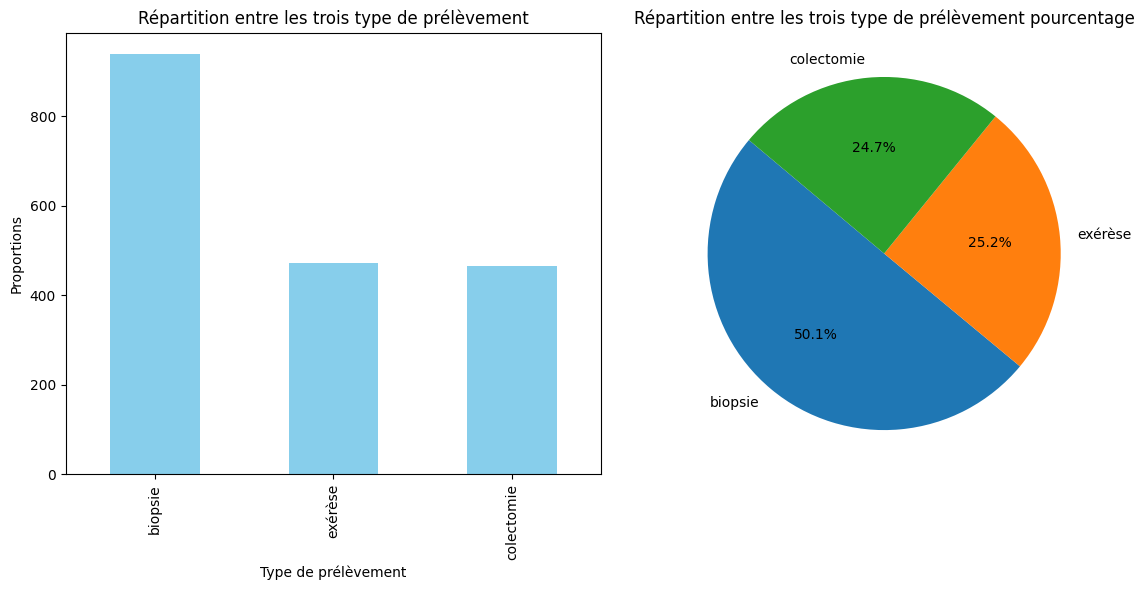

In [65]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts = df_CRO_filtre_3_reinit['operation'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition entre les trois type de prélèvement pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts.plot(kind='bar', color='skyblue')
plt.title("Répartition entre les trois type de prélèvement")
plt.xlabel('Type de prélèvement')
plt.ylabel('Proportions')

plt.tight_layout()

## Les anatomopathologistes (après filtration)

Text(0, 0.5, 'Occurence')

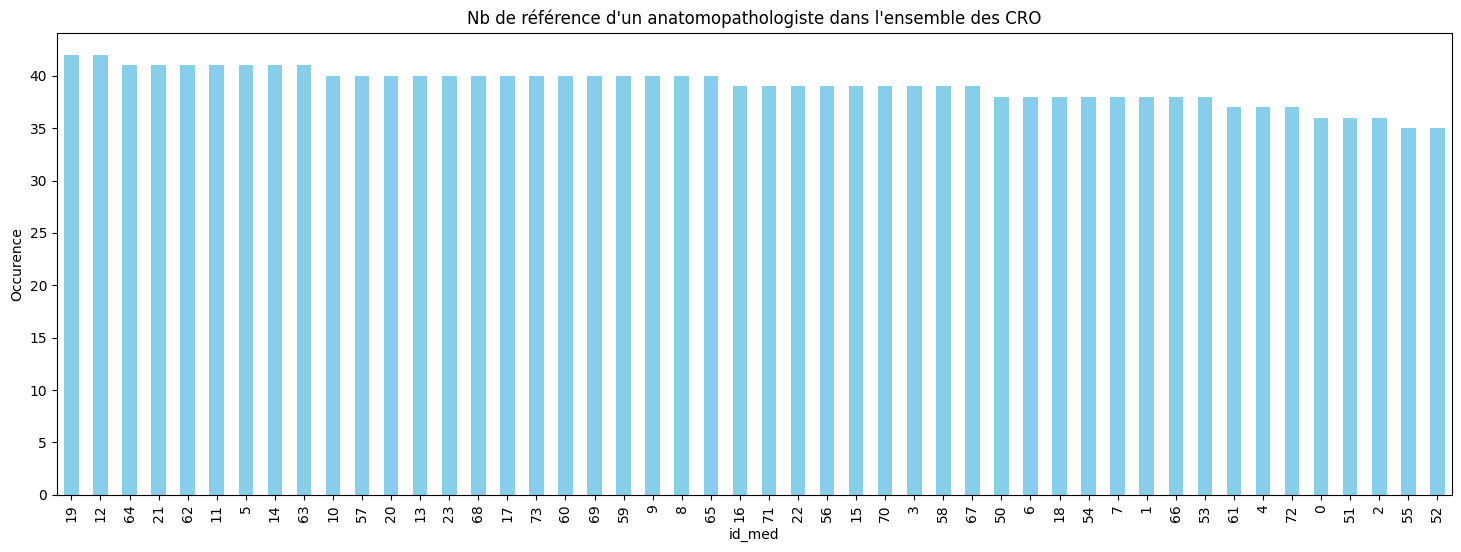

In [66]:
value_counts = df_CRO_filtre_3_reinit['id_med'].value_counts()

plt.figure(figsize=(18, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un anatomopathologiste dans l'ensemble des CRO")
plt.xlabel('id_med')
plt.ylabel('Occurence')

## Les patients (après filtration)

Text(0, 0.5, 'Occurence')

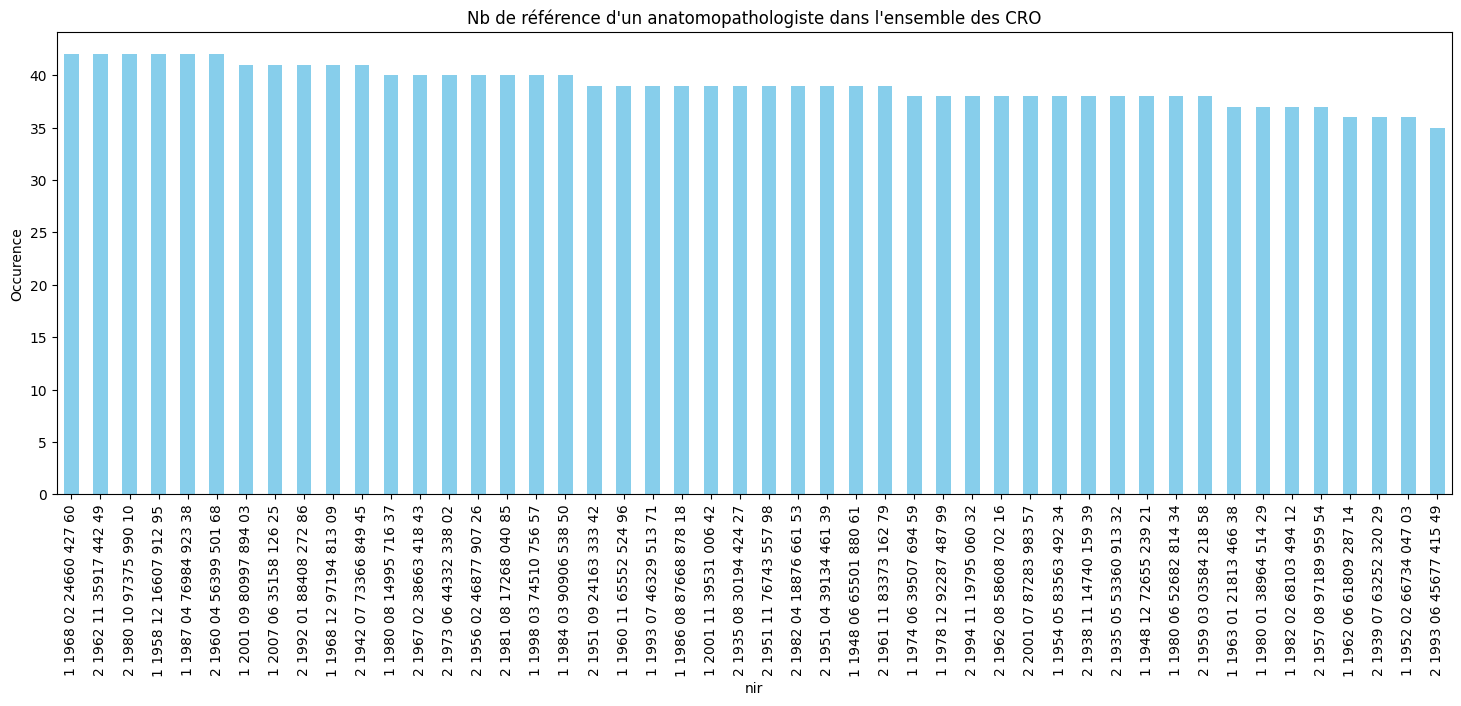

In [67]:
value_counts = df_CRO_filtre_3_reinit['nir'].value_counts()

plt.figure(figsize=(18, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un anatomopathologiste dans l'ensemble des CRO")
plt.xlabel('nir')
plt.ylabel('Occurence')

## Les diagnostics (après filtration)

In [68]:
diags_train_valid = diagnostics.query('organe != "foie"')
print("nb de diagnostics en référence:", len(diags_train_valid))
nb_diags = df_CRO_filtre_3_reinit.id_diag.unique()
print("nb de diagnostics qui apparaissent dans les CRO:", len(nb_diags))

nb de diagnostics en référence: 69
nb de diagnostics qui apparaissent dans les CRO: 69


Text(0, 0.5, 'Occurence')

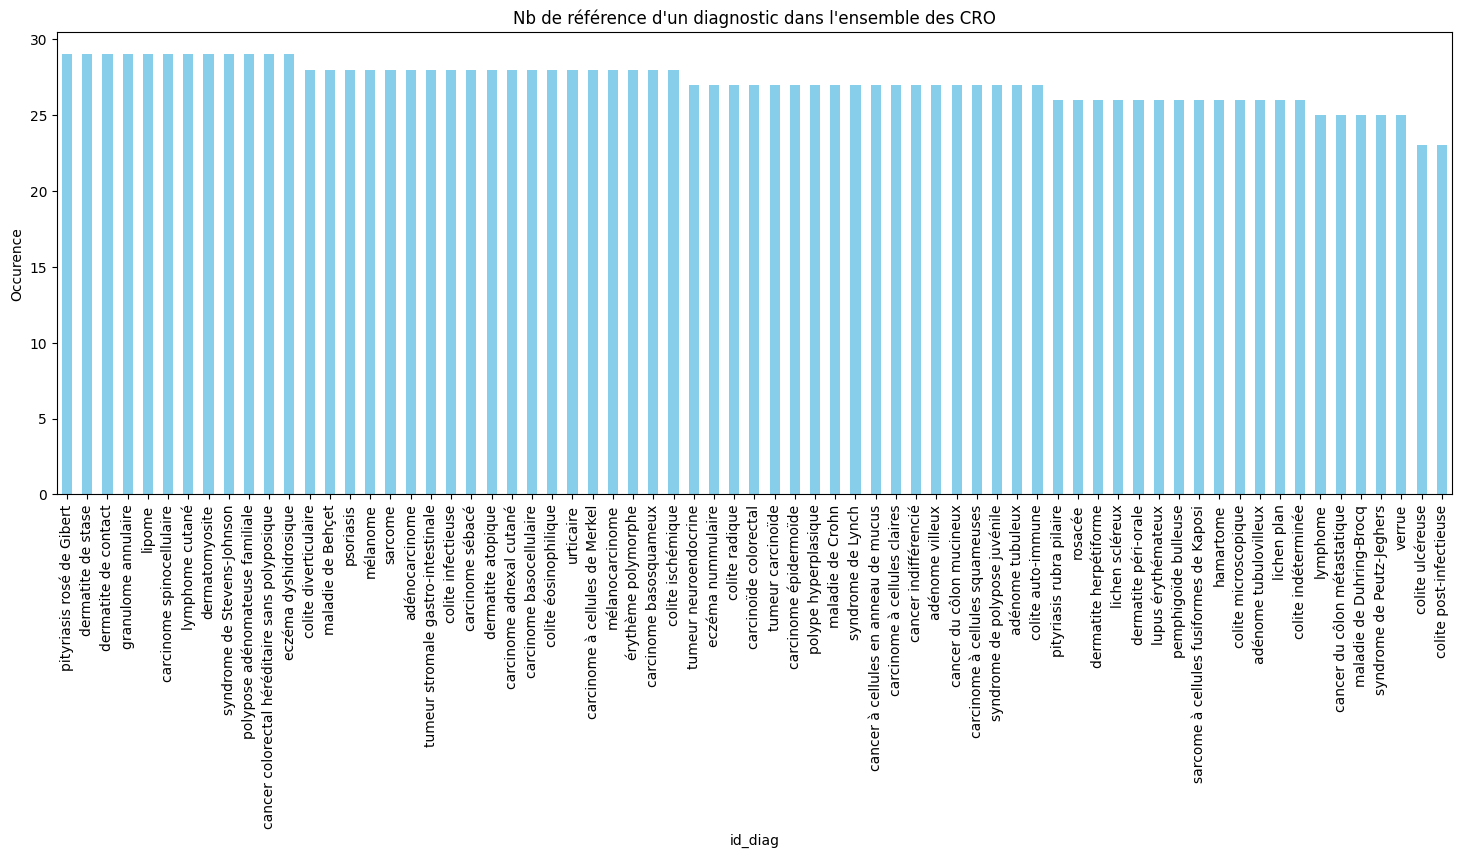

In [69]:
value_counts = df_CRO_filtre_3_reinit['diagnostic'].value_counts()

plt.figure(figsize=(18, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un diagnostic dans l'ensemble des CRO")
plt.xlabel('id_diag')
plt.ylabel('Occurence')

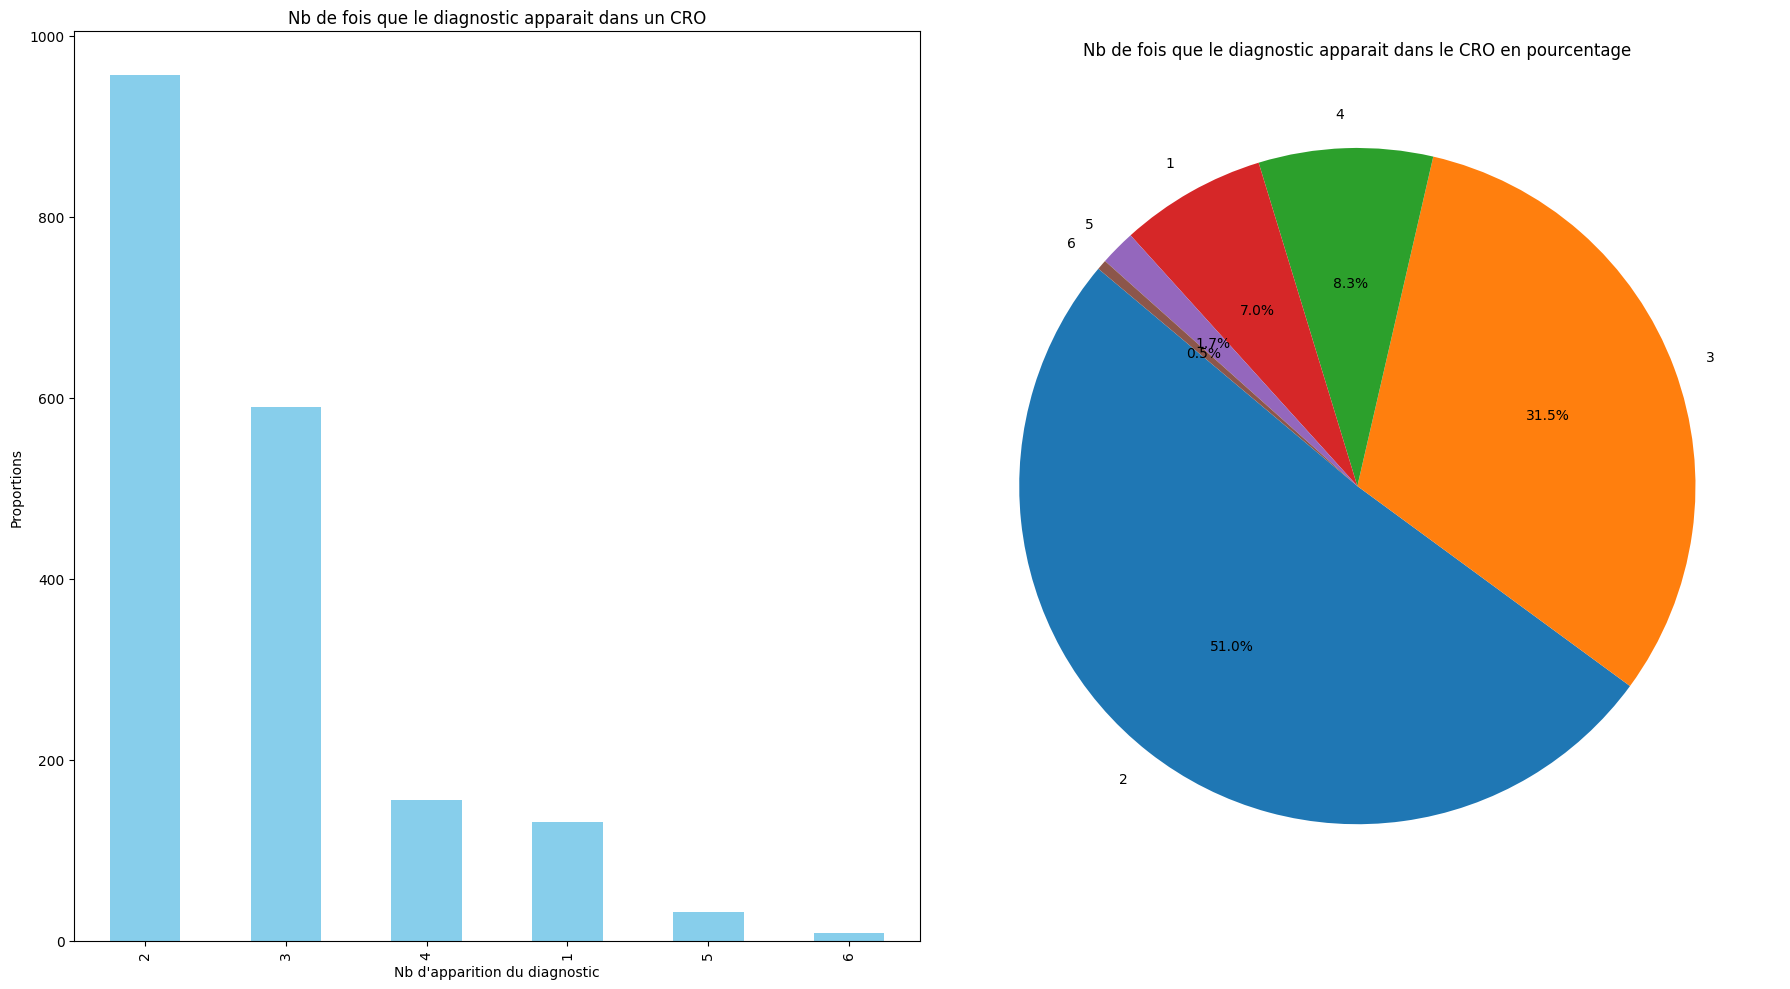

In [70]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts = df_CRO_filtre_3_reinit['nb_diag'].value_counts()

# Créez un camembert
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 2)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Nb de fois que le diagnostic apparait dans le CRO en pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts.plot(kind='bar', color='skyblue')
plt.title("Nb de fois que le diagnostic apparait dans un CRO")
plt.xlabel("Nb d'apparition du diagnostic")
plt.ylabel('Proportions')

plt.tight_layout()

## Répartition par nb de mots (après filtration)

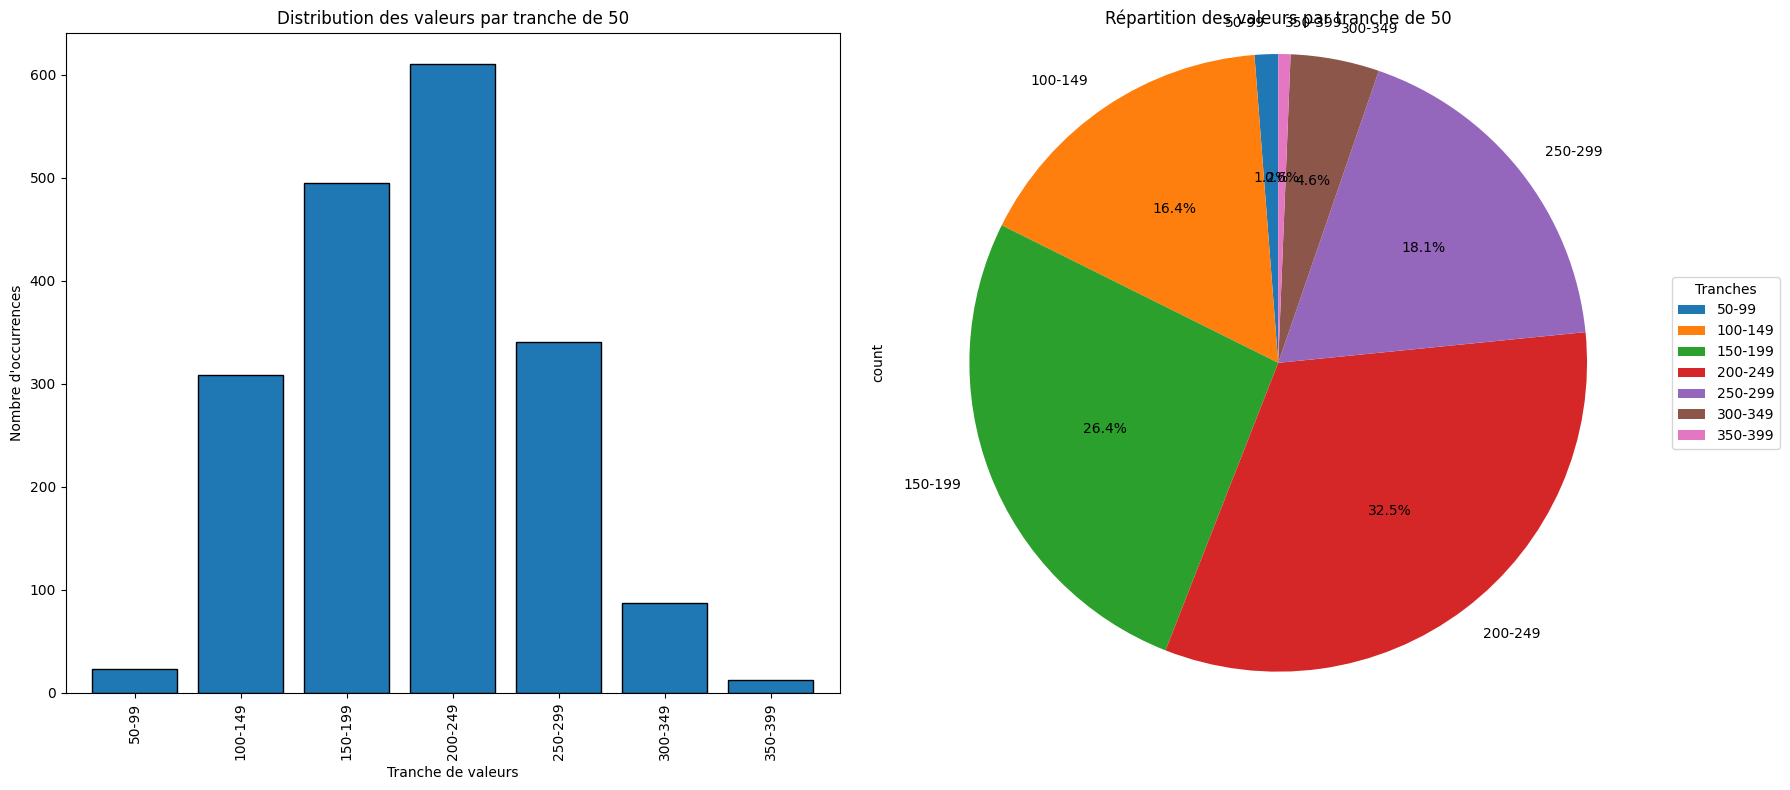

In [71]:
# Comptage du nombre d'occurrences dans chaque tranche
comptage_tranches_filtration = df_CRO_filtre_3_reinit['tranche'].value_counts(sort=False).sort_index()

# Création de la figure et des sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Graphique à barres
comptage_tranches_filtration[comptage_tranches_filtration != 0].plot(kind='bar', edgecolor='black', width=0.8, ax=ax1)
ax1.set_xlabel('Tranche de valeurs')
ax1.set_ylabel('Nombre d\'occurrences')
ax1.set_title(f'Distribution des valeurs par tranche de {tranche}')

# Graphique camembert
comptage_tranches_filtration[comptage_tranches_filtration != 0].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax2)
ax2.axis('equal')  # Assure un camembert circulaire
ax2.set_title(f'Répartition des valeurs par tranche de {tranche}')
ax2.legend(comptage_tranches_filtration[comptage_tranches_filtration != 0].index, title='Tranches', loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustements de la mise en page
plt.tight_layout()

# EDA test

In [72]:
df_CRO_test = df_CRO_all.query('organe == "foie"')
len(df_CRO_test)

373

## Nb d'occurence anatomopathologiste

In [73]:
print("nb d'anatomopathogiste en référénce:", len(meds))
nb_meds = df_CRO_test.id_med.unique()
print("nb d'anatomopathologiste qui apparaissent dans les CRO:", len(nb_meds))

nb d'anatomopathogiste en référénce: 100
nb d'anatomopathologiste qui apparaissent dans les CRO: 49


Text(0, 0.5, 'Occurence')

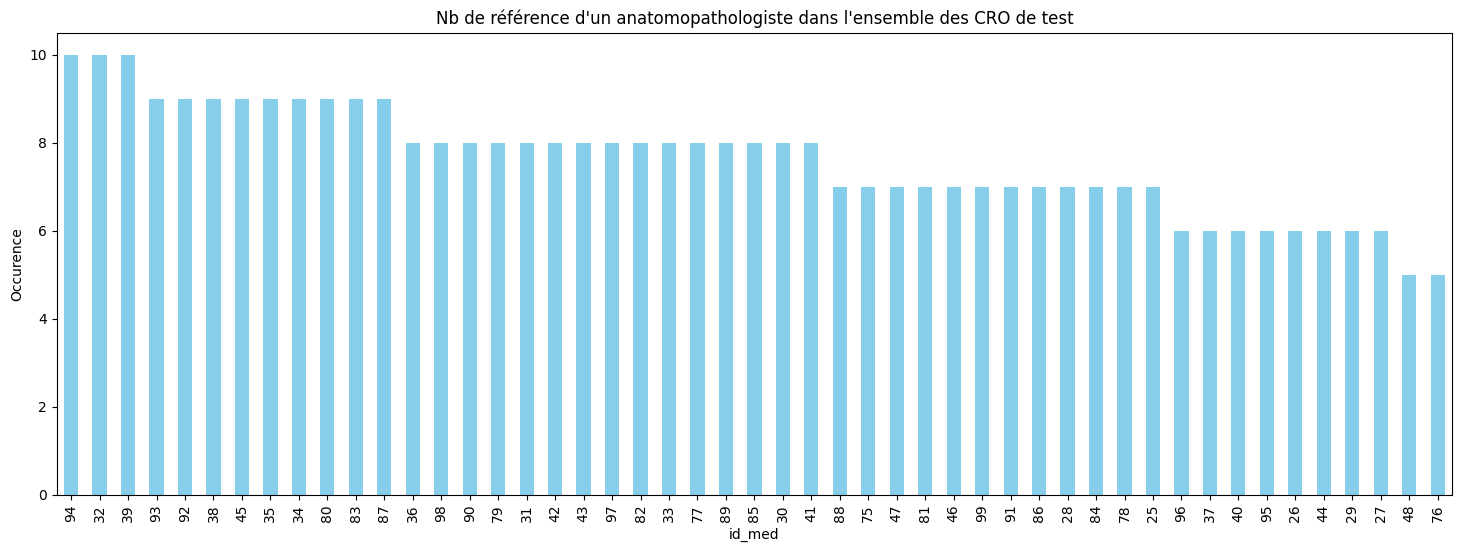

In [74]:
value_counts_med = df_CRO_test['id_med'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_med.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un anatomopathologiste dans l'ensemble des CRO de test")
plt.xlabel('id_med')
plt.ylabel('Occurence')

## Nb d'occurence d'un patient

In [75]:
print("nb de patient en référénce:", len(patients))
nb_patients = df_CRO_test.nir.unique()
print("nb de patient qui apparaissent dans les CRO:", len(nb_patients))

nb de patient en référénce: 400
nb de patient qui apparaissent dans les CRO: 295


Text(0, 0.5, 'Occurence')

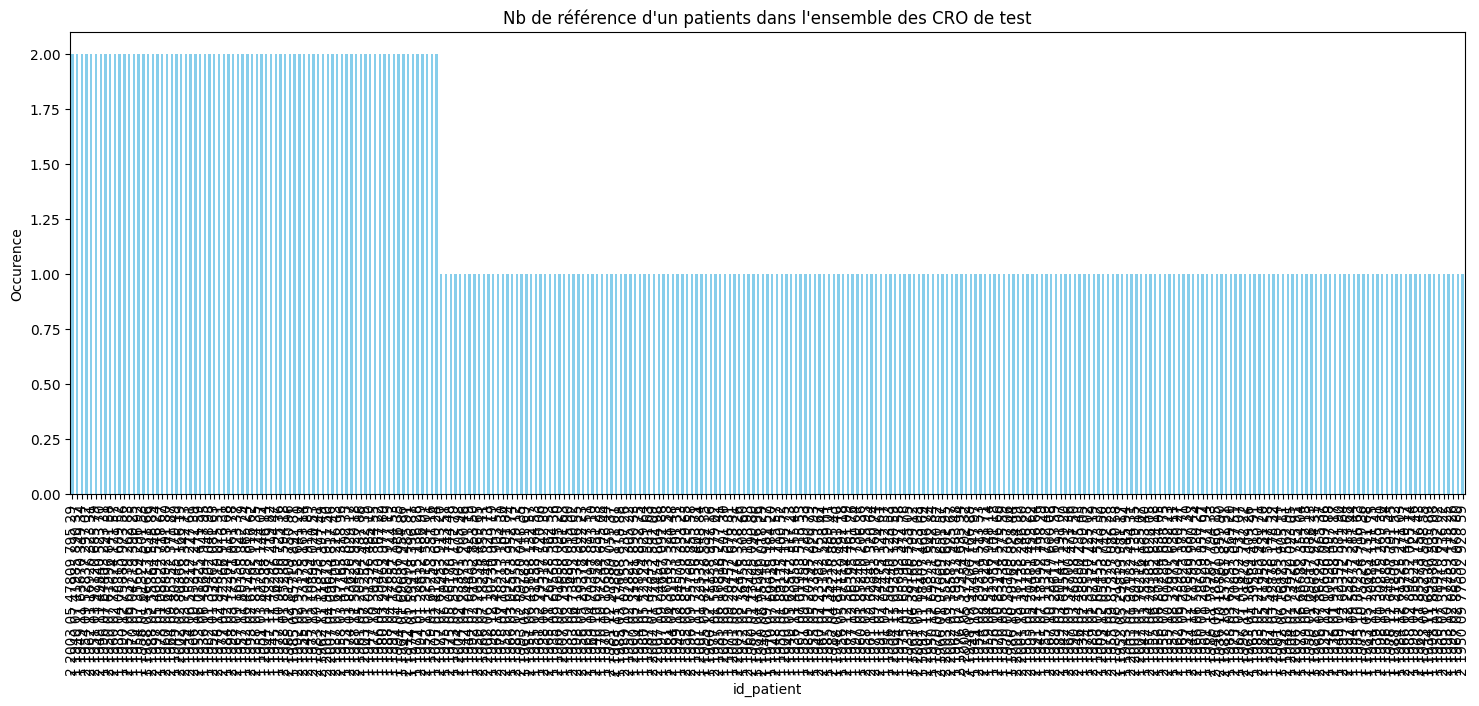

In [76]:
value_counts_patients = df_CRO_test['nir'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_patients.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un patients dans l'ensemble des CRO de test")
plt.xlabel('id_patient')
plt.ylabel('Occurence')

## Répartition des diagnostics

In [77]:
diags_train_valid = diagnostics.query('organe != "foie"')
print("nb de diagnostics en référence:", len(diags_train_valid))
nb_diags = df_CRO_test.id_diag.unique()
print("nb de diagnostics qui apparaissent dans les CRO:", len(nb_diags))

nb de diagnostics en référence: 69
nb de diagnostics qui apparaissent dans les CRO: 15


Text(0, 0.5, 'Occurence')

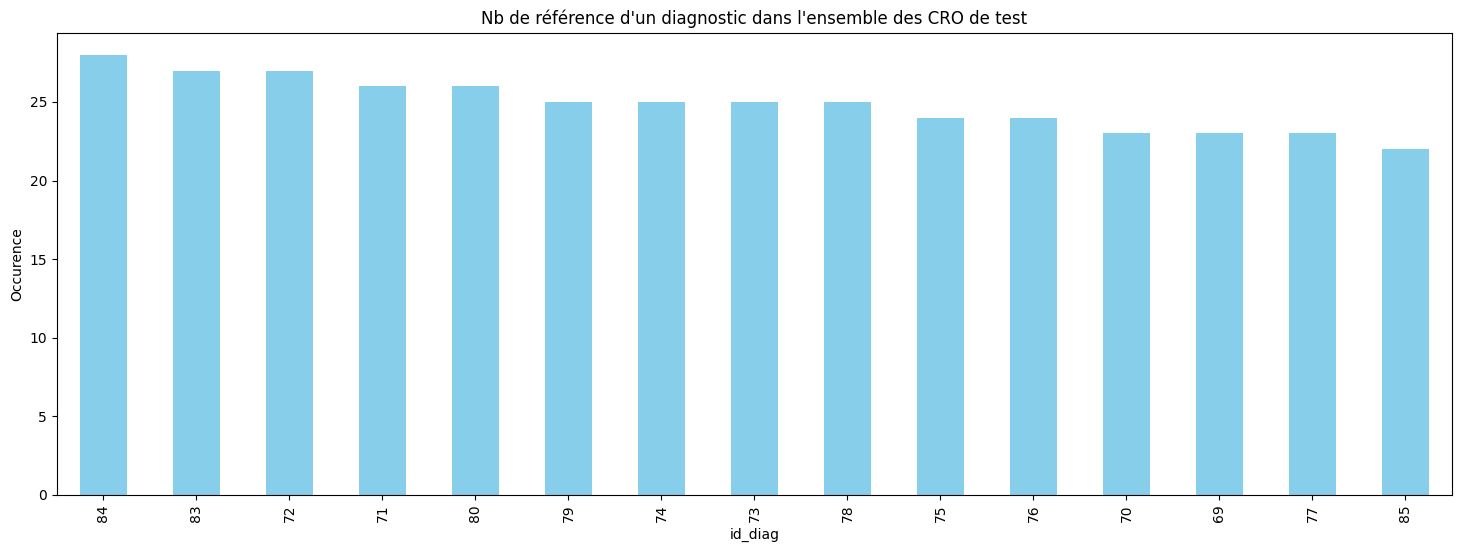

In [78]:
value_counts_diag = df_CRO_test['id_diag'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_diag.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un diagnostic dans l'ensemble des CRO de test")
plt.xlabel('id_diag')
plt.ylabel('Occurence')

# Langue et Qualité

## Langue

In [79]:
df_CRO_test_lang = df_CRO_test.copy(deep=True)

df_CRO_test_lang['language_proportions'] = df_CRO_test_lang.CRO.apply(detect_language_proportion)

In [80]:
df_CRO_test_lang.head(5)

CRO id_diag id_med  \
1926  Biopsie de foie\nRésumé :\nNous avons procédé ...      79     91   
1927  Rapport d'Anatomo-Pathologie\nPatient : Céline...      70     98   
1928  Rapport d'Anatomo-Pathologie\nPatient : Michel...      84     87   
1929  Biopsie de foie\nRésumé :\nNous avons procédé ...      71     32   
1930  Compte rendu d'histopathologie\nDr Antoine Des...      83     30   

                         nir                          source operation  \
1926  2 1966 09 61630 095 20  meta-llama/Llama-2-70b-chat-hf   biopsie   
1927  2 2002 02 80366 166 19  meta-llama/Llama-2-70b-chat-hf   exérèse   
1928  2 1961 05 20594 937 86  meta-llama/Llama-2-70b-chat-hf   exérèse   
1929  2 1988 11 50425 920 18  meta-llama/Llama-2-70b-chat-hf   biopsie   
1930  2 1974 03 83626 029 17  meta-llama/Llama-2-70b-chat-hf   exérèse   

          name_patient                                           address  \
1926    Agathe Vincent         boulevard Emmanuelle Leleu, 61630 Guibert   
1927    Céline Clément  37, chemin William Pinto, 80366 Lelièvre-sur-Mer   
1928   Michelle Launay                 7, boulevard Rolland, 20594 Dumas   
1929  Charlotte Mallet                   894, avenue Devaux, 50425 Maury   
1930     Claudine Roux           73, rue Meunier, 83626 Gimenez-la-Forêt   

        birthday               name_med organe                    diagnostic  \
1926  30/09/1966        Dr Julie Faivre   foie    carcinome hépatocellulaire   
1927  28/02/2002        Dr Alix Rolland   foie  hyperplasie nodulaire focale   
1928  05/05/1961  Dr Christiane Perrier   foie                hépatoblastome   
1929  24/11/1988      Dr Pierre Lévêque   foie                       adénome   
1930  13/03/1974    Dr Antoine Descamps   foie       lymphome non hodgkinien   

     cancer language_proportions  
1926      1              fr, 1.0  
1927      0              fr, 1.0  
1928      1    fr, 0.57/en, 0.43  
1929      0              fr, 1.0  
1930      1              fr, 1.0

In [81]:
nb_CRO_test_en = len(df_CRO_test_lang.query('language_proportions != "fr, 1.0"'))
print('nb de CRO dans une autre langue (complet ou partiel):', nb_CRO_test_en, 'soit', round(nb_CRO_test_en * 100 / len(df_CRO)), '% des CRO tests générés.')

nb de CRO dans une autre langue (complet ou partiel): 94 soit 5 % des CRO tests générés.


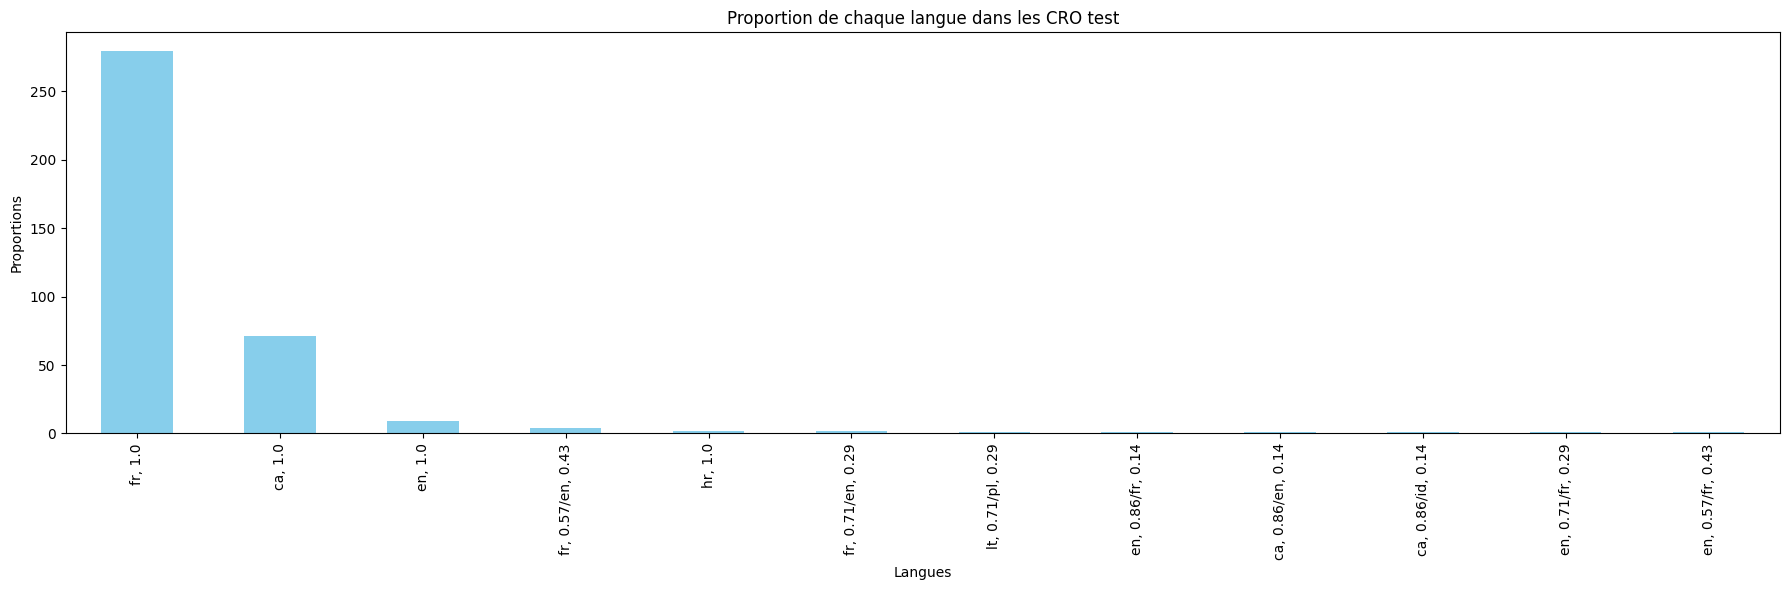

In [82]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_lang_test = df_CRO_test_lang['language_proportions'].value_counts()

plt.figure(figsize=(18, 6))

# Créez un graphique en barres
value_counts_lang_test.plot(kind='bar', color='skyblue')
plt.title('Proportion de chaque langue dans les CRO test')
plt.xlabel('Langues')
plt.ylabel('Proportions')

plt.tight_layout()

In [83]:
CRO_test_non_fr = df_CRO_test_lang.query('language_proportions != "fr, 1.0"').reset_index()
for index in range(0, len(CRO_test_non_fr)):
    print(CRO_test_non_fr.CRO[index], '\n')

Rapport d'Anatomo-Pathologie
Patient : Michelle Launay (née le 05/05/1961)
Adresse : 7, boulevard Rolland, 20594 Dumas
Numéro de sécurité sociale : 2 1961 05 20594 937 86
Examen histopathologique de l'exérèse de foie
Anatomopathologiste : Dr Christiane Perrier
Résumé :
L'exérèse de foie réalisée chez Michelle Launay montre une formation tumorale bien circonscrite, measuring approximately 5 cm in diameter, located in the left lobe of the liver. The tumor is composed of a mixture of epithelial and mesenchymal cells, with areas of necrosis and hemorrhage. The tumor cells have a distinctive embryonal appearance, with prominent nucleoli and abundant mitotic figures. Immunohistochemical staining reveals positivity for alpha-fetoprotein and CD34, consistent with a diagnosis of hepatoblastoma. No evidence of metastasis was found in the surrounding tissues.
Diagnostic : Hépatoblastome
Recommandations :
Surveillance régulière pour évaluer l'évolution de la maladie et détecter rapidement tout sig

## Qualité

### Nb de mots dans les CRO

In [84]:
df_CRO_test_lang['nb_word'] = df_CRO_test_lang.CRO.apply(nb_word_in_text) 

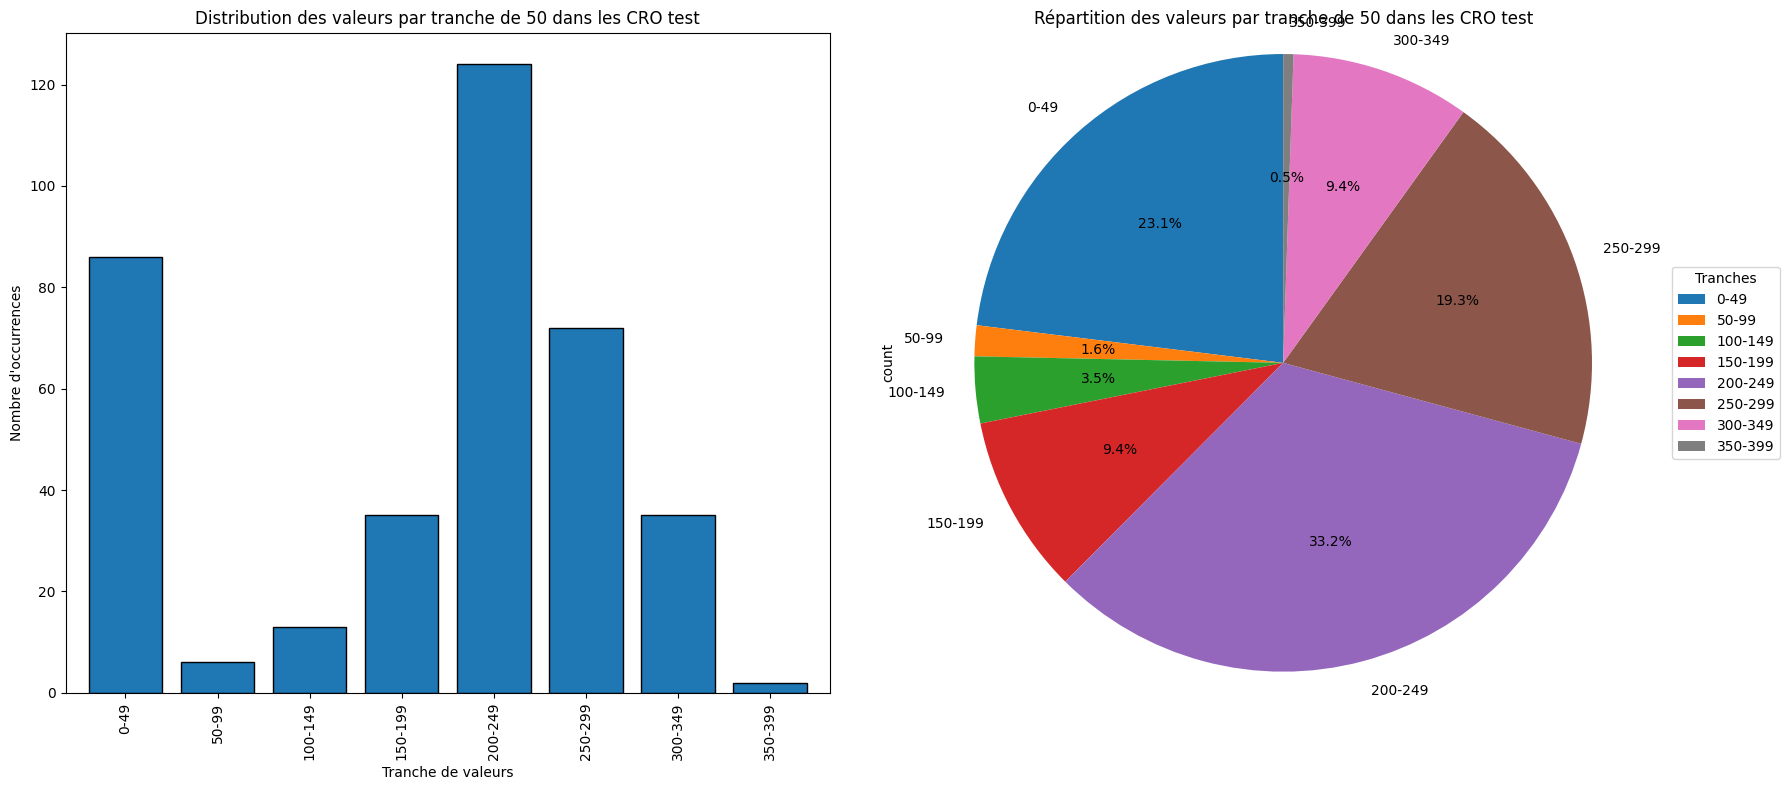

In [85]:
tranche = 50

# Créer des tranches
tranches_test = [(i, i + tranche - 1) for i in range(0, df_CRO_test_lang['nb_word'].max(), tranche)]

# Création de la colonne de tranche en utilisant la fonction pd.cut
df_CRO_test_lang['tranche'] = pd.cut(df_CRO_test_lang['nb_word'], bins=[i[0] for i in tranches_test] + [df_CRO_test_lang['nb_word'].max()], labels=[f"{i[0]}-{i[1]}" for i in tranches_test])

# Comptage du nombre d'occurrences dans chaque tranche
value_counts_tranches_test = df_CRO_test_lang['tranche'].value_counts(sort=False).sort_index()

# Création de la figure et des sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Graphique à barres
value_counts_tranches_test[value_counts_tranches_test != 0].plot(kind='bar', edgecolor='black', width=0.8, ax=ax1)
ax1.set_xlabel('Tranche de valeurs')
ax1.set_ylabel('Nombre d\'occurrences')
ax1.set_title(f'Distribution des valeurs par tranche de {tranche} dans les CRO test')

# Graphique camembert
value_counts_tranches_test[value_counts_tranches_test != 0].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax2)
ax2.axis('equal')  # Assure un camembert circulaire
ax2.set_title(f'Répartition des valeurs par tranche de {tranche} dans les CRO test')
ax2.legend(value_counts_tranches_test[value_counts_tranches_test != 0].index, title='Tranches', loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustements de la mise en page
plt.tight_layout()

In [86]:
CRO_test_tranche_query = df_CRO_test_lang.query('tranche == "300-349"').reset_index()
for index in range(0, len(CRO_test_tranche_query)):
    print(CRO_test_tranche_query.CRO[index], '\n')

Rapport d'Anatomo-Pathologie
Patient : Céline Clément
Naissance : 28/02/2002
Adresse : 37, chemin William Pinto, 80366 Lelièvre-sur-Mer
Numéro de sécurité sociale : 2 2002 02 80366 166 19
Examen histopathologique de l'exérèse de foie
Observations macroscopiques :
L'exérèse de foie mesure 10 cm de long sur 8 cm de largeur et 4 cm d'épaisseur. La surface cutanée est régulière, sans signes de dégenerescence ou d'inflammation apparents.
Description des coupes histologiques :
Les coupes histologiques ont été préparées à partir de l'extrémité distale de l'exérèse de foie. Les coupes ont été colorées thanks à la technique d'H&E.
Coupe 1 (Frozen section) :
La coupe montre une structure nodulaire bien circonscrite, composée de cellules étoilées et de fibres conjonctives. Les cellules étoilées sont petites, rondes à ovalaires, avec un noyau central clair et des nucléoles visibles. Il n'y a pas de signe de dégénérescence ou d'inflammation. Diagnostic : Hyperplasie nodulaire focale.
Coupe 2 (Paraf

## CRO avec la note de fin 'Ceci est compte-rendu fictif'

In [87]:
df_CRO_test_lang['note_fin'] = df_CRO_test_lang.CRO.apply(CRO_note_valid)

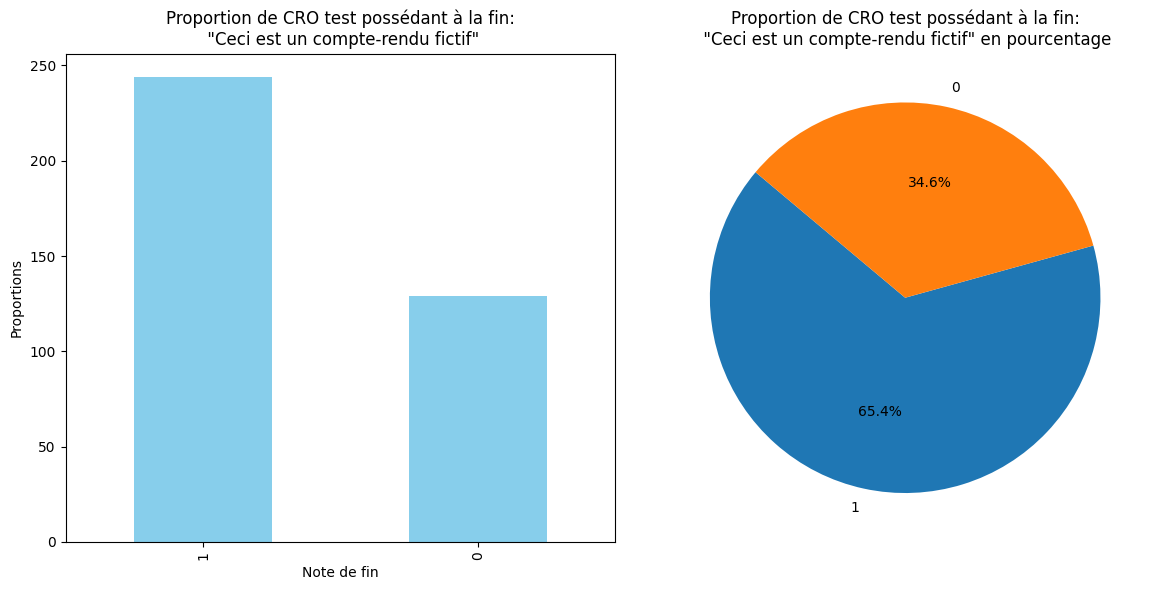

In [88]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_note_fin_test = df_CRO_test_lang['note_fin'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_note_fin_test, labels=value_counts_note_fin_test.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion de CRO test possédant à la fin:\n "Ceci est un compte-rendu fictif" en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_note_fin_test.plot(kind='bar', color='skyblue')
plt.title('Proportion de CRO test possédant à la fin:\n "Ceci est un compte-rendu fictif"')
plt.xlabel('Note de fin')
plt.ylabel('Proportions')

plt.tight_layout()

In [89]:
CRO_test_note_0 = df_CRO_test_lang.query('note_fin == 0').reset_index()
for i in range(0, len(CRO_test_note_0)):
    print(CRO_test_note_0.CRO[i], '\n')

Biops 

Biopsie 

Biopsie de foie
Résumé :
Le présent rapport décrit les résultats de la biopsie de foie realizée 

Biopsie de foie
Résumé :
carcinome squirrheux de la vesicule biliaire
Patient : Dumas Lucas, né le 03/09/1970, habite au Boulevard Etienne Pereira, 04219 Clément, Numéro de sécurité sociale : 1 1970 09 04219 390 25
Anatomopathologiste : Dr Étienne Coste
Description de la pièce : La pièce est une biopsie de foie réalisée à partir d'une tumeur suspecte palpable au niveau de la région hépat 

Biopsie de foie
Résumé :
Nous avons procédé à l'examen histopathologique d'une biopsie de foie prélevée chez un patient atteint d'un cancer des canaux biliaires intrahépatiques. Les résultats obtenus permettent de diagnostiquer un cancer des canaux biliaires intrahépatiques pour un seul organe.
Patient : Victor Texier, né le 25/11/2004, habite au 428, chemin de Hoareau, 40538 Lebreton, Numéro de sécurité sociale : 1 2004 11 40538 746 14.
Examen histopathologique :
Les échantillons ont é

# Correspondance CRO et datas

## Ajout des colonnes vérifiants la présence des données dans les CRO

In [90]:
df_CRO_test_occurrence = df_CRO_test_lang.copy(deep=True)

df_CRO_test_occurrence['nb_diag'] = df_CRO_test_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['diagnostic']), axis=1)
df_CRO_test_occurrence['diag_pr'] = df_CRO_test_occurrence['nb_diag'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_test_occurrence['nb_med'] = df_CRO_test_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['name_med']), axis=1)
df_CRO_test_occurrence['med_pr'] = df_CRO_test_occurrence['nb_med'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_test_occurrence['nb_patient'] = df_CRO_test_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['name_patient']), axis=1)
df_CRO_test_occurrence['patient_pr'] = df_CRO_test_occurrence['nb_patient'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_test_occurrence['nb_birthday'] = df_CRO_test_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['birthday']), axis=1)
df_CRO_test_occurrence['birthday_pr'] = df_CRO_test_occurrence['nb_birthday'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_test_occurrence['nb_address'] = df_CRO_test_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['address']), axis=1)
df_CRO_test_occurrence['address_pr'] = df_CRO_test_occurrence['nb_address'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_test_occurrence['nb_nir'] = df_CRO_test_occurrence.apply(lambda row: trouver_occurrences(row['CRO'], row['nir']), axis=1)
df_CRO_test_occurrence['nir_pr'] = df_CRO_test_occurrence['nb_nir'].apply(lambda x: 1 if x > 0 else 0)

df_CRO_test_occurrence['note'] = df_CRO_test_occurrence['diag_pr'] + df_CRO_test_occurrence['med_pr'] + df_CRO_test_occurrence['patient_pr'] + df_CRO_test_occurrence['birthday_pr']\
    + df_CRO_test_occurrence['address_pr'] + df_CRO_test_occurrence['nir_pr']

## La présence des diagnostics dans les CRO test

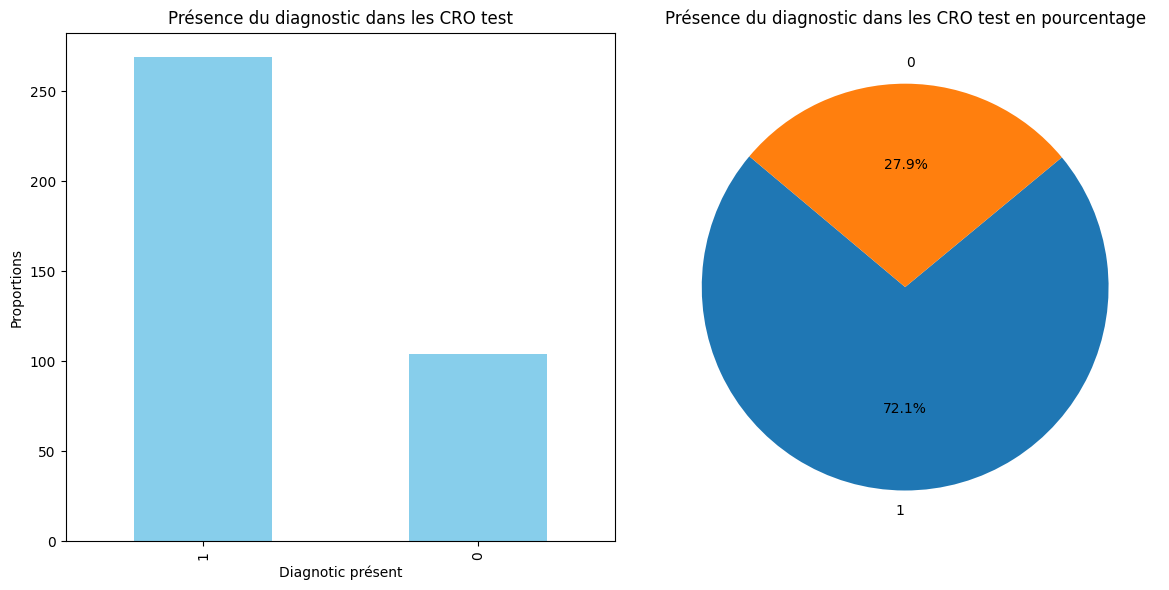

In [91]:
# Présence des diagnostics dans les CRO
value_counts_diag_nb_test = df_CRO_test_occurrence['diag_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_diag_nb_test, labels=value_counts_diag_nb_test.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence du diagnostic dans les CRO test en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_diag_nb_test.plot(kind='bar', color='skyblue')
plt.title('Présence du diagnostic dans les CRO test')
plt.xlabel('Diagnotic présent')
plt.ylabel('Proportions')

plt.tight_layout()

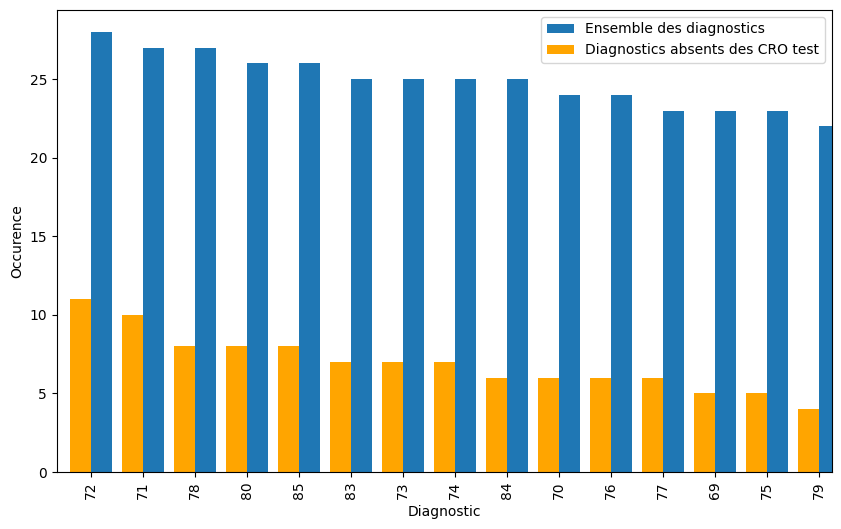

In [92]:
# détermination des diagnostics absents des CRO

diagnostics_absent_test = df_CRO_test_occurrence.query('diag_pr == 0')

# Initialisez le graphique
fig, ax = plt.subplots(figsize=(10, 6))

# Graphique de l'ensemble du DataFrame
df_CRO_test['id_diag'].value_counts().plot(kind='bar', ax=ax, position=0, width=0.4, label='Ensemble des diagnostics')

# Graphique du sous-ensemble filtré
diagnostics_absent_test['id_diag'].value_counts().plot(kind='bar', ax=ax, position=1, width=0.4, color='orange', label='Diagnostics absents des CRO test')
ax.set_xlabel('Diagnostic')
ax.set_ylabel('Occurence')
ax.legend()

In [93]:
diag = '85'
query = f'(id_diag == "{diag}") and (diag_pr == 0)'
sans_diag_test = df_CRO_test_occurrence.query(query).index
print(sans_diag_test)

Index([2017, 2024, 2070, 2094, 2163, 2214, 2240, 2279], dtype='int64')


In [94]:
for index in sans_diag_test:
    CRO_test_sans_diag = df_CRO_test_occurrence.query(query).CRO[index]
    print(CRO_test_sans_diag, '\n')

Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

Biopsie de foie
Résumé :
Le présent rapport décrit les résultats de la biopsie de foie realizée chez Monsieur Jacques Bernier, né le 08/08/1957, habitant au 60, rue Jacqueline Lemonnier, 37975 Mathieu, having a security number 1 1957 08 37975 638 11. La biopsie a été effectuée suite à des symptômes persistants de douleur abdominale et de fatigue.
Examen histopathologique :
Les échantillons de tissus ont été prélevés lors de la biopsie et ont été fixés dans du formol pour une analyse histopathologique. Les coupes ont été colorées thanks à la technique d'Hématoxyline et d'Eosine.
Description des findings :
Après examen attentif des coupes histopathologiques, il est possible de détecter une prolifération anormale de cellules épithéliales tubulaires qui envahissent les espaces de Disse et infiltrent les tissus surroundants. Les cellules tumorales sont petites, rondes ou ovales, avec une nucléation basophile et une cytoplasm

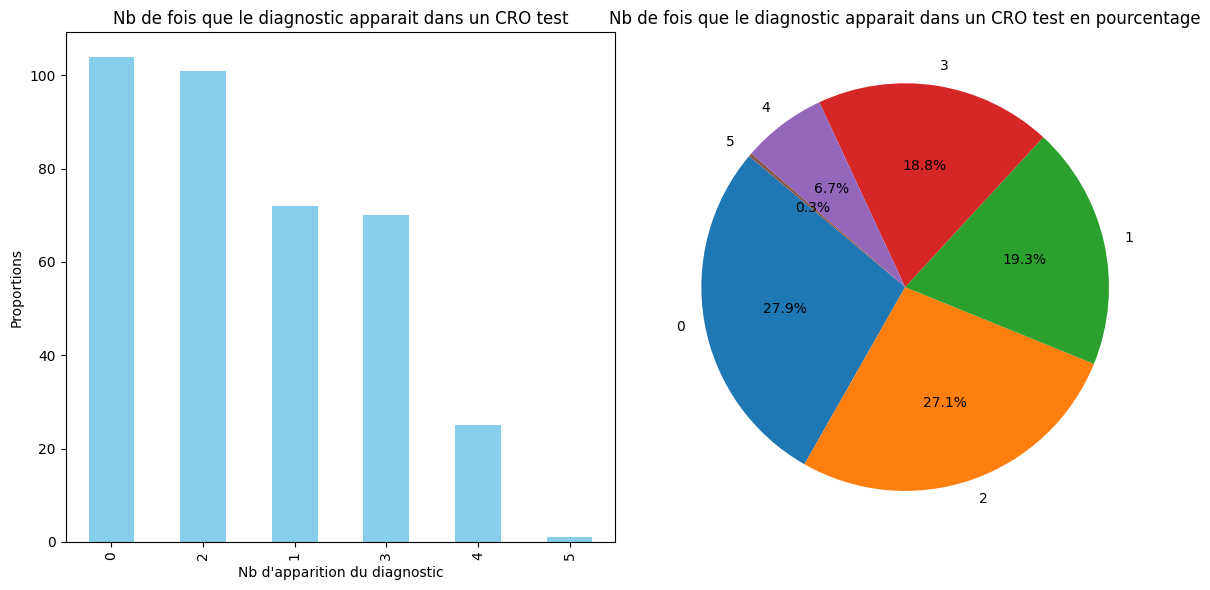

In [95]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_diag_occ_test = df_CRO_test_occurrence['nb_diag'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_diag_occ_test, labels=value_counts_diag_occ_test.index, autopct='%1.1f%%', startangle=140)
plt.title("Nb de fois que le diagnostic apparait dans un CRO test en pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_diag_occ_test.plot(kind='bar', color='skyblue')
plt.title("Nb de fois que le diagnostic apparait dans un CRO test")
plt.xlabel("Nb d'apparition du diagnostic")
plt.ylabel('Proportions')

plt.tight_layout()

## La présence de l'anatomopathologiste dans le CRO test

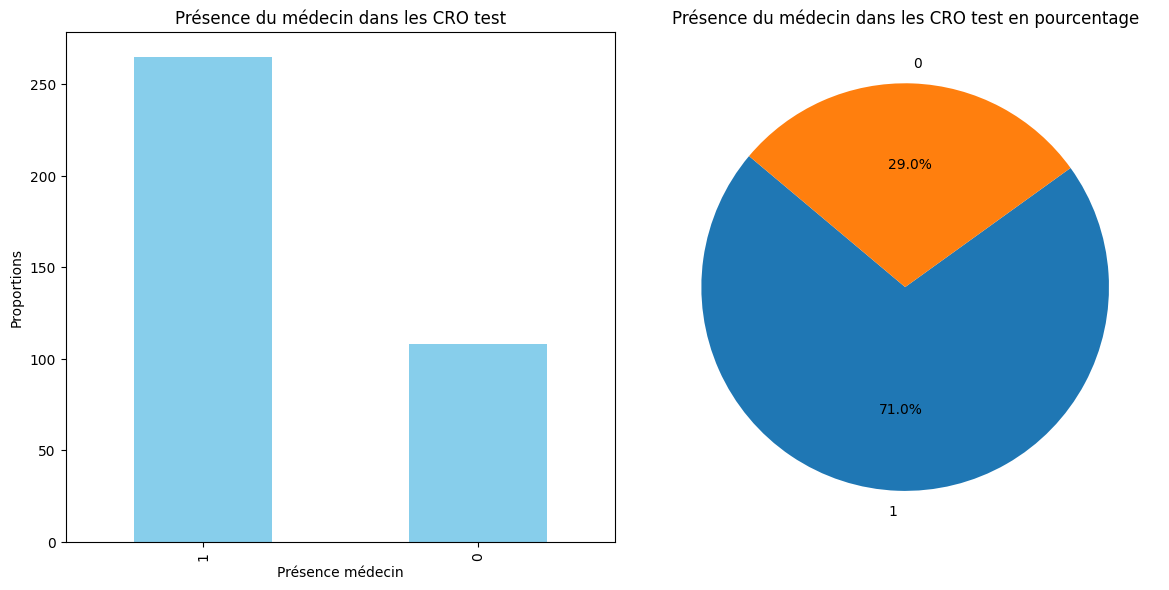

In [96]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_med_pr_test = df_CRO_test_occurrence['med_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_med_pr_test, labels=value_counts_med_pr_test.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence du médecin dans les CRO test en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_med_pr_test.plot(kind='bar', color='skyblue')
plt.title('Présence du médecin dans les CRO test')
plt.xlabel('Présence médecin')
plt.ylabel('Proportions')

plt.tight_layout()

In [97]:
index_sans_med_test = df_CRO_test_occurrence.query('med_pr == 0').index
for index in index_sans_med_test:
    print('médecin', df_CRO_test_occurrence.name_med[index], index)
    print(df_CRO_test_occurrence.CRO[index], '\n')

médecin Dr Christiane Perrier 1941
Biops 

médecin Dr Alfred Fournier 1946
Biopsie hépatique
Résumé :
Nous avons procédé à l'exérèse d'une portion de foie chez Agnès Jourdan, née le 03/01/1988, habitante à 7, chemin Bourgeois, 85280 Dumas, having a fictive social security number 2 1988 01 85280 594 18, dans le cadre d'une investigation histopathologique. Les résultats obtenus sont les suivants :
Macroscopic examination :
Le specimen consists of a single piece of liver tissue measuring approximately 3 cm in length and 2 cm in width. The surface is irregular and shows evidence of recent trauma. There are no visible signs of inflammation or necrosis.
Microscopic examination :
Sections show a preserved architecture of the hepatic lobule with portal triads consisting of a terminal branch of the bile duct, a small artery, and a vein. The hepatocytes display a normal morphology with distinct cell membranes and abundant cytoplasm containing prominent nucleoli. No significant inflammatory infil

## La présence du patient dans le CRO test

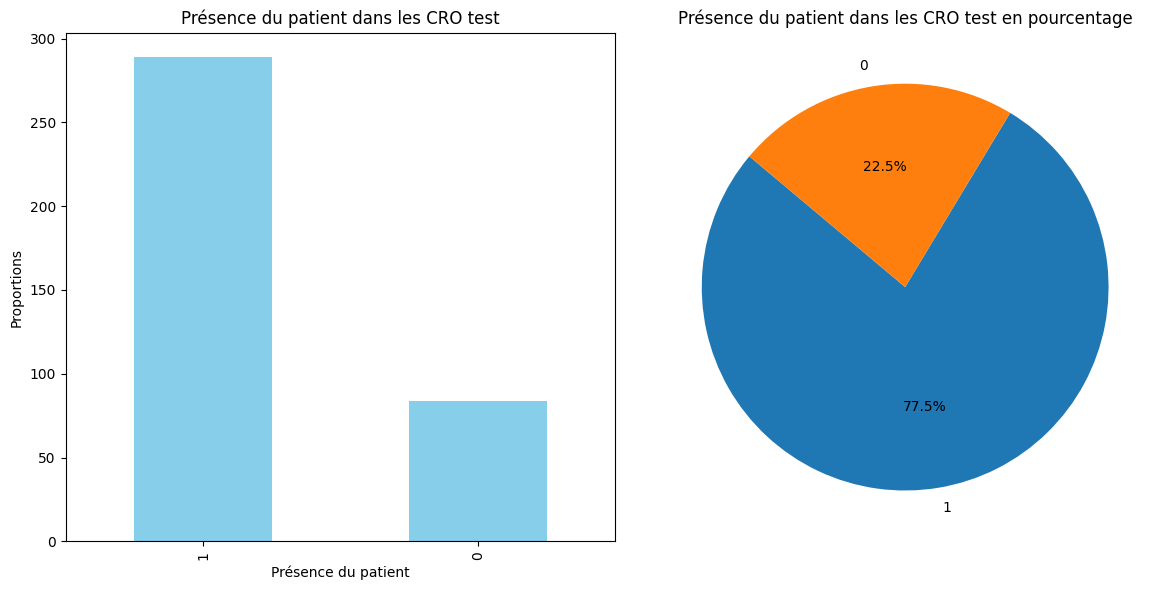

In [98]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_patient_pr_test = df_CRO_test_occurrence['patient_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_patient_pr_test, labels=value_counts_patient_pr_test.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence du patient dans les CRO test en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_patient_pr_test.plot(kind='bar', color='skyblue')
plt.title('Présence du patient dans les CRO test')
plt.xlabel('Présence du patient')
plt.ylabel('Proportions')

plt.tight_layout()

In [99]:
index_CRO_sans_patient_test = df_CRO_test_occurrence.query('patient_pr == 0').index
for index in index_CRO_sans_patient_test:
    print(index)
    print(df_CRO_test_occurrence.CRO[index], '\n')

1941
Biops 

1948
Biopsie 

1951
Biopsie de foie
Résumé :
Le présent rapport décrit les résultats de la biopsie de foie realizée 

1975
Biopsie de foie
Résumé :
carcinome squirrheux de la vesicule biliaire
Patient : Dumas Lucas, né le 03/09/1970, habite au Boulevard Etienne Pereira, 04219 Clément, Numéro de sécurité sociale : 1 1970 09 04219 390 25
Anatomopathologiste : Dr Étienne Coste
Description de la pièce : La pièce est une biopsie de foie réalisée à partir d'une tumeur suspecte palpable au niveau de la région hépat 

2016
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2017
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2019
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2021
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2022
Biops 

2027
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2030
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2031
Current Model
meta-ll

## La présence de la date de naissance dans les CRO test

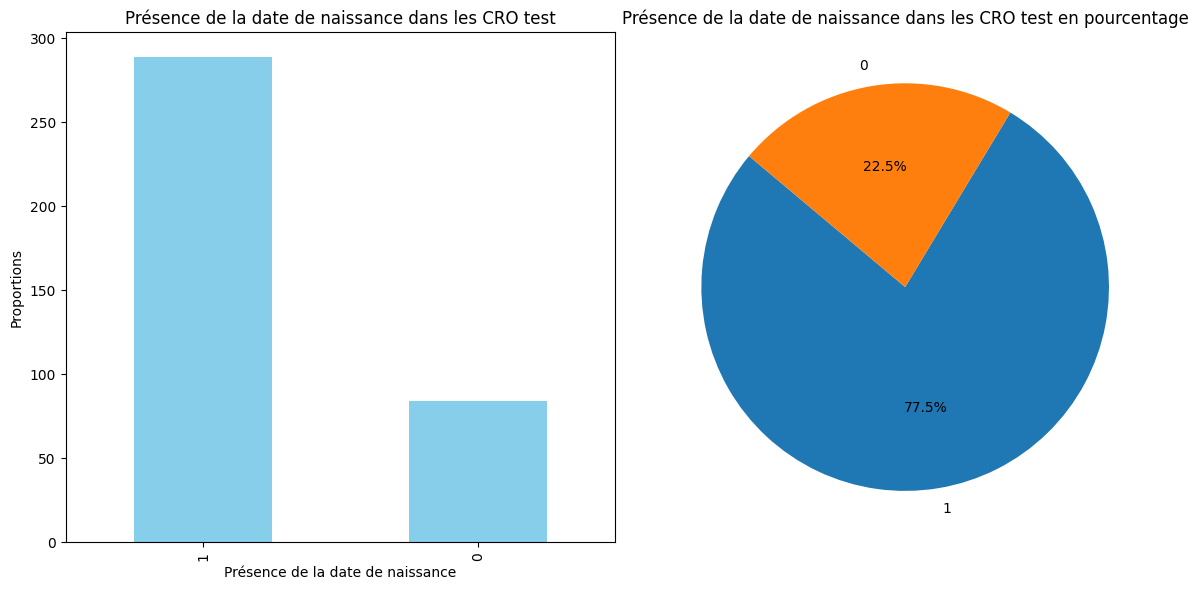

In [100]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_date_pr_test = df_CRO_test_occurrence['birthday_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_date_pr_test, labels=value_counts_date_pr_test.index, autopct='%1.1f%%', startangle=140)
plt.title('Présence de la date de naissance dans les CRO test en pourcentage')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_date_pr_test.plot(kind='bar', color='skyblue')
plt.title('Présence de la date de naissance dans les CRO test')
plt.xlabel('Présence de la date de naissance')
plt.ylabel('Proportions')

plt.tight_layout()

In [101]:
index_CRO_sans_date_test = df_CRO_test_occurrence.query('birthday_pr == 0').index
for index in index_CRO_sans_date_test:
    print(index)
    print(df_CRO_test_occurrence.CRO[index], '\n')

1941
Biops 

1948
Biopsie 

1951
Biopsie de foie
Résumé :
Le présent rapport décrit les résultats de la biopsie de foie realizée 

2016
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2017
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2019
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2021
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2022
Biops 

2027
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2030
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2031
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2032
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2036
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2041
Compte rendu d'histopathologie
Dr Christiane Perrier, anatomopathologiste
Patient : Émile Boulanger
Naissance : 03/04/ 

2044
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2050
Curre

## La présence de l'adresse du patient dans les CRO test

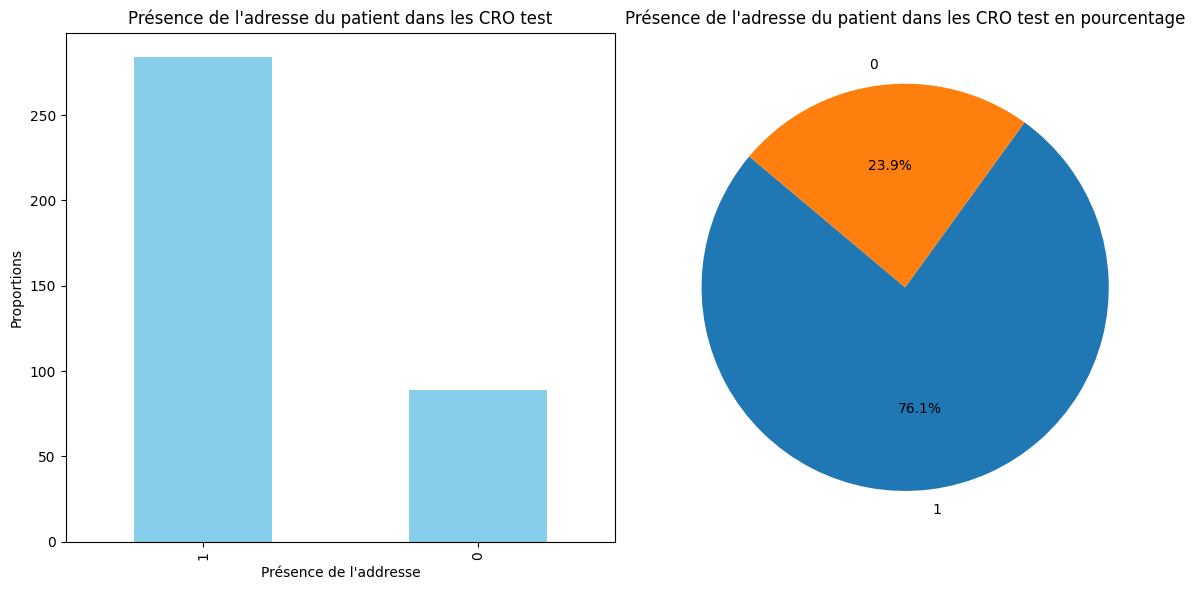

In [102]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_address_pr_test = df_CRO_test_occurrence['address_pr'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_address_pr_test, labels=value_counts_address_pr_test.index, autopct='%1.1f%%', startangle=140)
plt.title("Présence de l'adresse du patient dans les CRO test en pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_address_pr_test.plot(kind='bar', color='skyblue')
plt.title("Présence de l'adresse du patient dans les CRO test")
plt.xlabel("Présence de l'addresse")
plt.ylabel('Proportions')

plt.tight_layout()

In [103]:
index_CRO_sans_address_test = df_CRO_test_occurrence.query('address_pr == 0').index
for index in index_CRO_sans_address_test:
    print(index)
    print(df_CRO_test_occurrence.CRO[index], '\n')

1941
Biops 

1948
Biopsie 

1951
Biopsie de foie
Résumé :
Le présent rapport décrit les résultats de la biopsie de foie realizée 

1975
Biopsie de foie
Résumé :
carcinome squirrheux de la vesicule biliaire
Patient : Dumas Lucas, né le 03/09/1970, habite au Boulevard Etienne Pereira, 04219 Clément, Numéro de sécurité sociale : 1 1970 09 04219 390 25
Anatomopathologiste : Dr Étienne Coste
Description de la pièce : La pièce est une biopsie de foie réalisée à partir d'une tumeur suspecte palpable au niveau de la région hépat 

1999
Biopsie de foie réalisée chez Zacharie Roy (né le 09/06/1942)
Résumé :
Le présent rapport décrit les résultats de la biopsie de foie 

2016
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2017
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2019
Current Model
meta-llama/Llama-2-70b-chat-hf
Model
 page
Website 

2020
Biopsie de foie
Résumé :
Le présent rapport décrit les résultats de la biopsie de foie realizée chez Inès HERV

## Note finale dans les CRO test

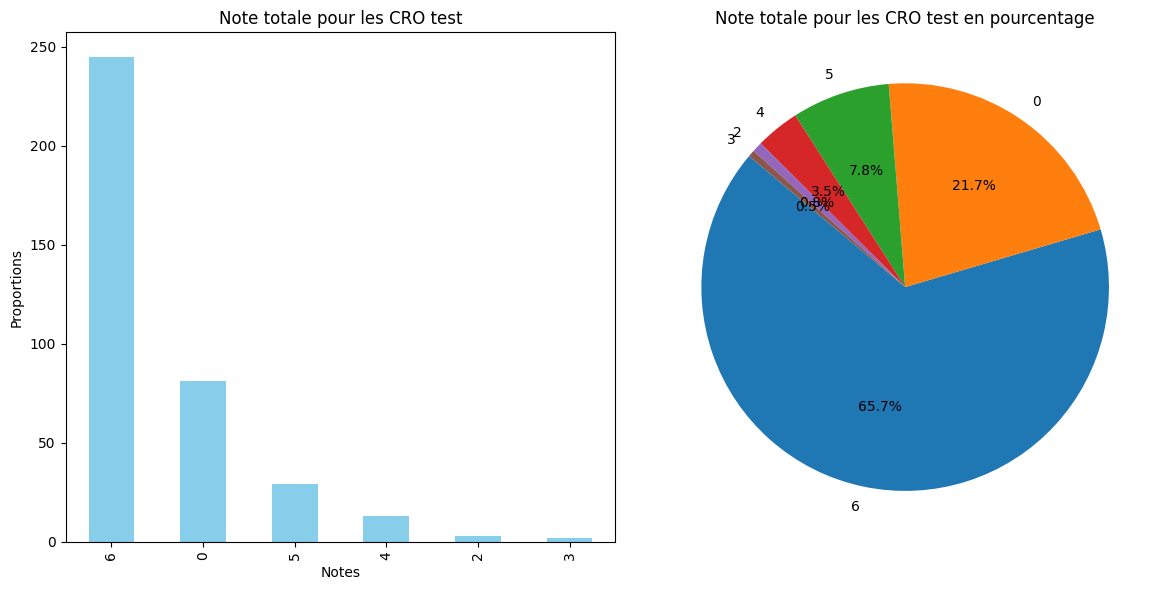

In [104]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_note_test = df_CRO_test_occurrence['note'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_note_test, labels=value_counts_note_test.index, autopct='%1.1f%%', startangle=140)
plt.title("Note totale pour les CRO test en pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_note_test.plot(kind='bar', color='skyblue')
plt.title("Note totale pour les CRO test")
plt.xlabel('Notes')
plt.ylabel('Proportions')

plt.tight_layout()

# CRO test valides

### La langue

In [105]:
df_CRO_test_filtre_1 = df_CRO_test_occurrence.query('language_proportions == "fr, 1.0"')
print('Taille originale du df CRO:', len(df_CRO_test_occurrence), 'CRO test,')
print('taille après filtrage de la langue (fr 100%):', len(df_CRO_test_filtre_1), 'CRO test,')
print('soit une perte de', round((len(df_CRO_test_occurrence) - len(df_CRO_test_filtre_1)) * 100 / len(df_CRO_test_occurrence), 2), '%.')

Taille originale du df CRO: 373 CRO test,
taille après filtrage de la langue (fr 100%): 279 CRO test,
soit une perte de 25.2 %.


### La présence de toutes les données

In [106]:
df_CRO_test_filtre_2 = df_CRO_test_filtre_1.query('note == 6')
print('Taille après filtrage de la note (6/6):', len(df_CRO_test_filtre_2), 'CRO test,')
print('soit une perte de', round((len(df_CRO_test_occurrence) - len(df_CRO_test_filtre_2)) * 100 / len(df_CRO_test_occurrence), 2), '% par rapport au df test sans filtre.')

Taille après filtrage de la note (6/6): 238 CRO test,
soit une perte de 36.19 % par rapport au df test sans filtre.


### La présence de la note de fin

In [107]:
df_CRO_test_filtre_3 = df_CRO_test_filtre_2.query('note_fin == 1')
print('Taille après filtrage de la présence de la note de fin:', len(df_CRO_test_filtre_3), 'CRO test,')
print('soit une perte de', round((len(df_CRO_test_occurrence) - len(df_CRO_test_filtre_3)) * 100 / len(df_CRO_test_occurrence), 2), '% par rapport au df test sans filtre.')

Taille après filtrage de la présence de la note de fin: 227 CRO test,
soit une perte de 39.14 % par rapport au df test sans filtre.


In [108]:
df_CRO_test_filtre_3_reinit = df_CRO_test_filtre_3.reset_index(drop=True)
for index in range(0, len(df_CRO_test_filtre_3_reinit) -1):
    print(df_CRO_test_filtre_3_reinit.CRO[index], '\n')

Biopsie de foie
Résumé :
Nous avons procédé à l'examen histopathologique d'une biopsie de foie prélevée chez Agathe Vincent, née le 30/09/1966, habitante au Boulevard Emmanuelle Leleu, 61630 Guibert, having the social security number 2 1966 09 61630 095 20. L'examen a été effectué dans le cadre d'un bilan médical ordonné par son médecin traitant, Dr Dupont.
Description macroscopique :
La biopsie de foie prélevée mesure 1,5 cm de long sur 1,2 cm de largeur et 0,8 cm d'épaisseur. Elle est légèrement friable et présente une couleur jaune pâle.
Description microscopique :
Après coloration avec hematoxyline et eosine, nous avons observé une prolifération tumorale composée de cellules énormes, polygonalales, aux nucléus irréguliers et hyperchromatiques. Les cellules sont disposées de manière aléatoire, sans structure glandulaire ni stromale apparente. Nous avons également identifié des mitoses fréquentes (jusqu'à 4 mitoses par champ de vision) ainsi que des figures de dégénérescence cellulai

# EDA test après filtration

## Le type de prélèvement (après filtrage)

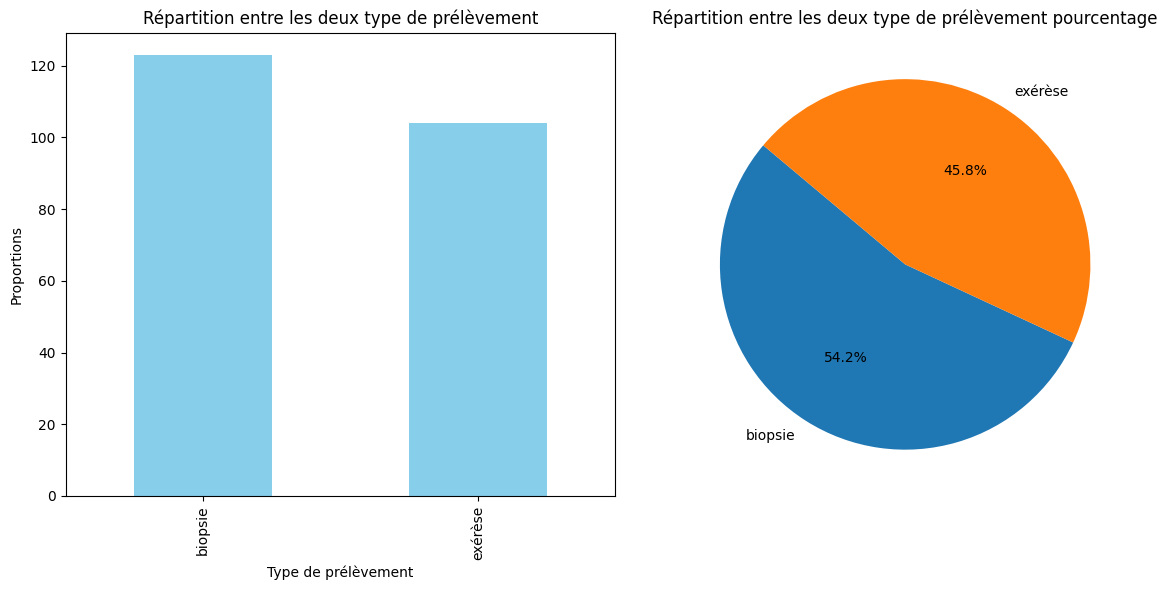

In [109]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_test = df_CRO_test_filtre_3_reinit['operation'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_test, labels=value_counts_test.index, autopct='%1.1f%%', startangle=140)
plt.title("Répartition entre les deux type de prélèvement pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_test.plot(kind='bar', color='skyblue')
plt.title("Répartition entre les deux type de prélèvement")
plt.xlabel('Type de prélèvement')
plt.ylabel('Proportions')

plt.tight_layout()

## Les anatomopathologistes (après filtration)

Text(0, 0.5, 'Occurence')

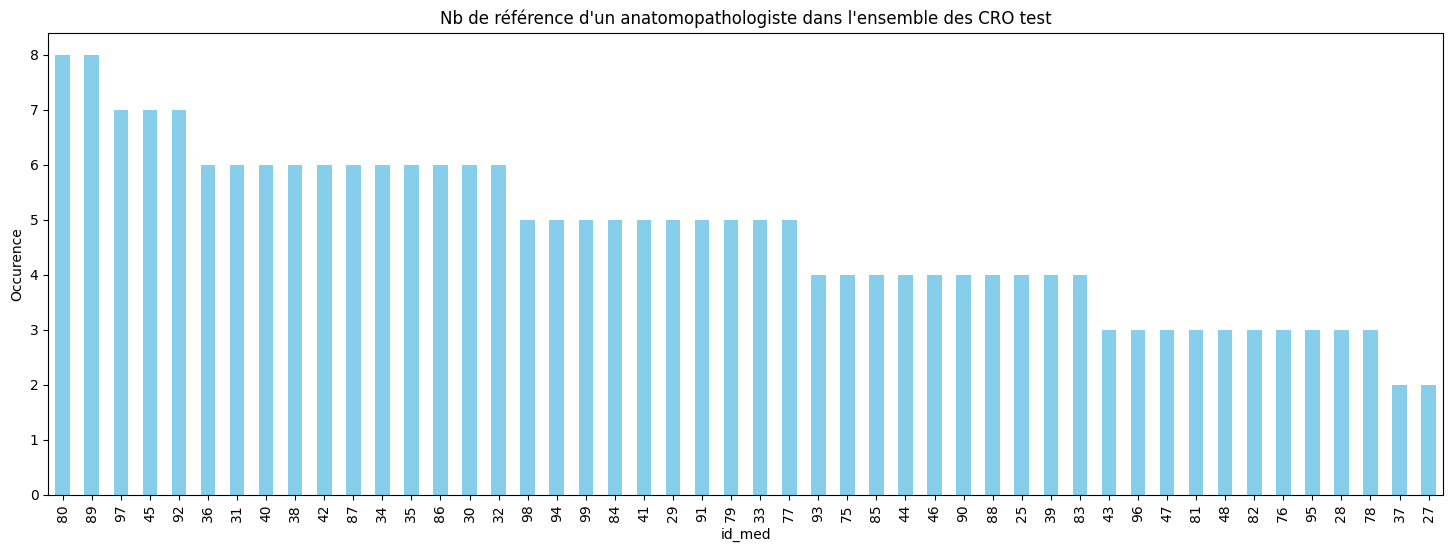

In [110]:
value_counts_test = df_CRO_test_filtre_3_reinit['id_med'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_test.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un anatomopathologiste dans l'ensemble des CRO test")
plt.xlabel('id_med')
plt.ylabel('Occurence')

## Les patients (après filtration)

Text(0, 0.5, 'Occurence')

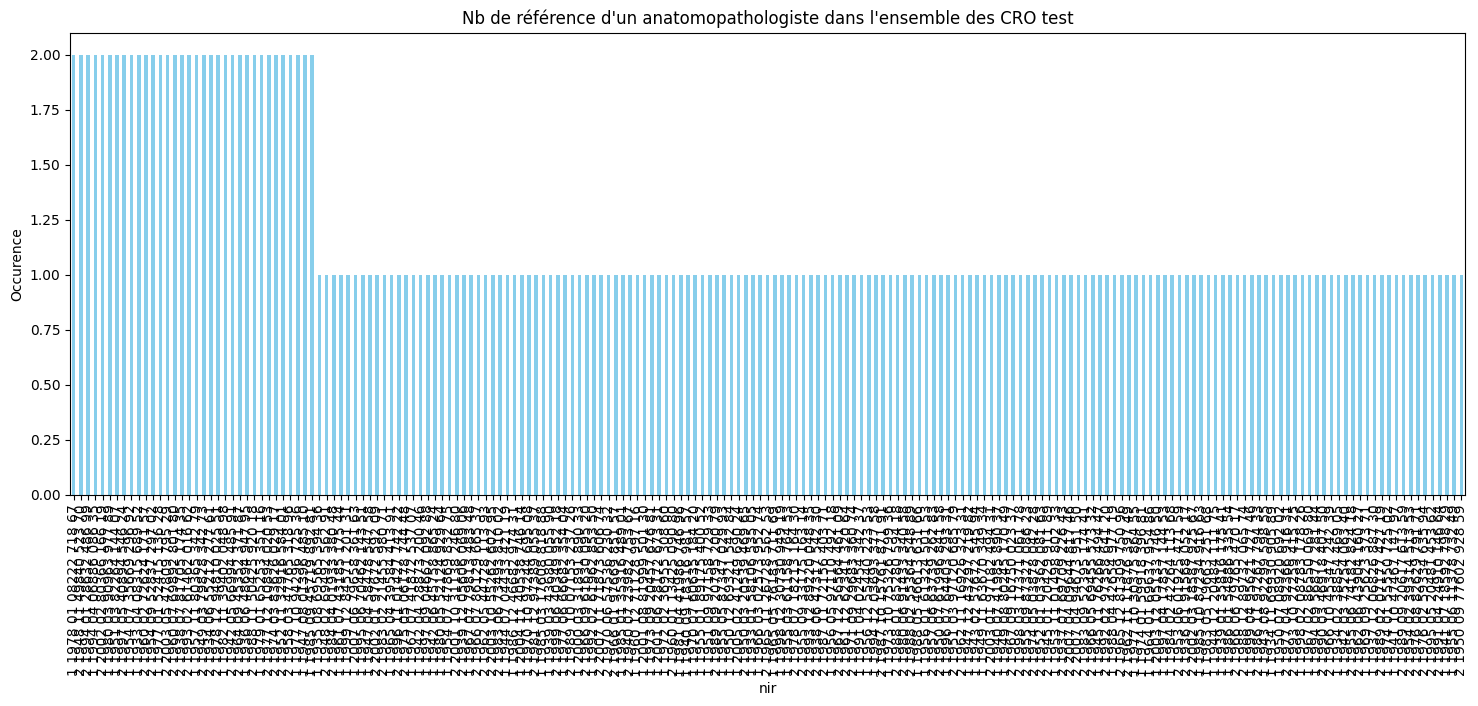

In [111]:
value_counts_test = df_CRO_test_filtre_3_reinit['nir'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_test.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un anatomopathologiste dans l'ensemble des CRO test")
plt.xlabel('nir')
plt.ylabel('Occurence')

## Les diagnostics (après filtration)

In [112]:
diags_test = diagnostics.query('organe == "foie"')
print("nb de diagnostics en référence:", len(diags_test))
nb_diags_test = df_CRO_test_filtre_3_reinit.id_diag.unique()
print("nb de diagnostics qui apparaissent dans les CRO test:", len(nb_diags_test))

nb de diagnostics en référence: 15
nb de diagnostics qui apparaissent dans les CRO test: 15


Text(0, 0.5, 'Occurence')

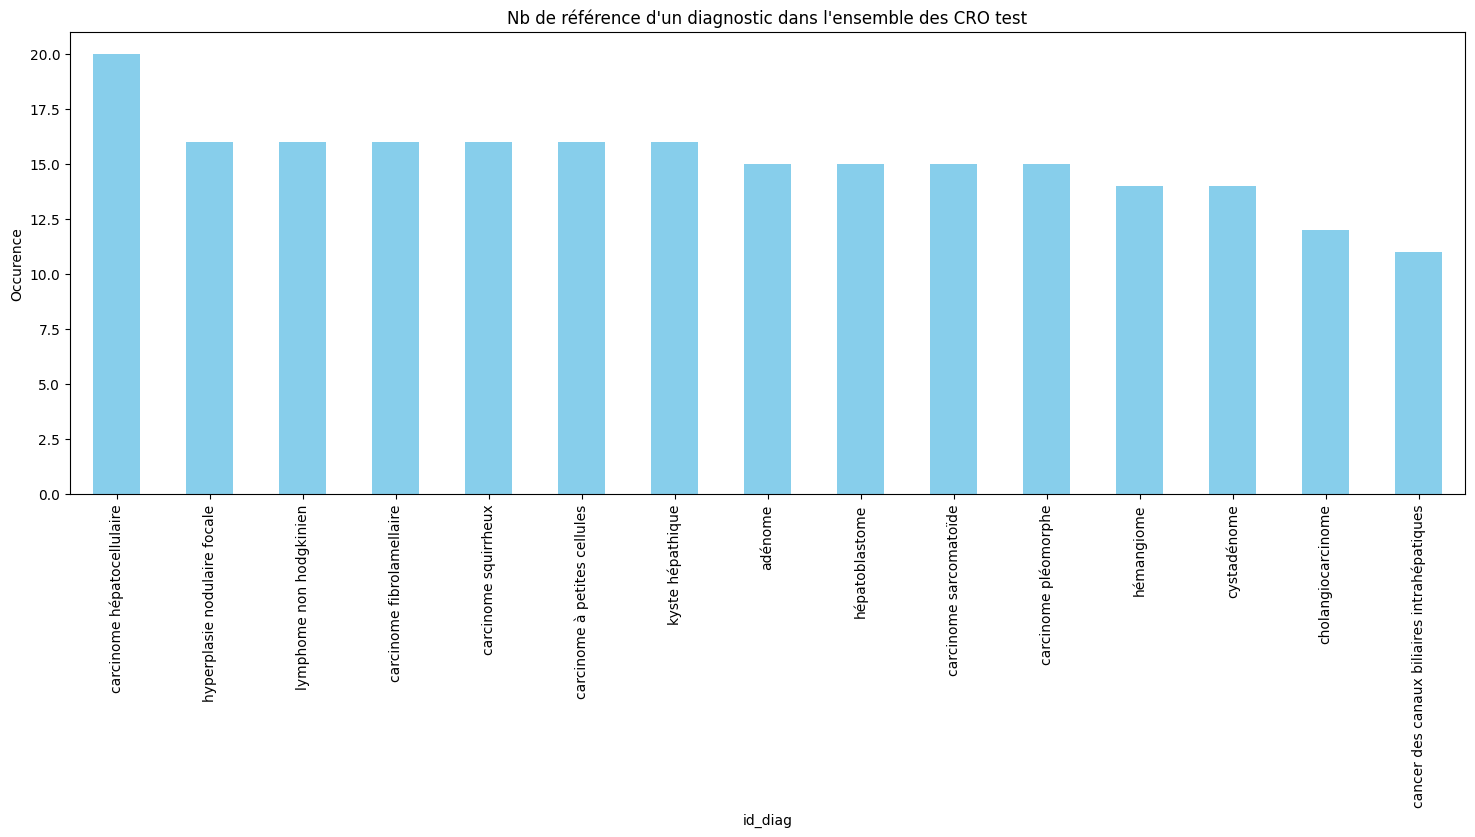

In [113]:
value_counts_test = df_CRO_test_filtre_3_reinit['diagnostic'].value_counts()

plt.figure(figsize=(18, 6))
value_counts_test.plot(kind='bar', color='skyblue')
plt.title("Nb de référence d'un diagnostic dans l'ensemble des CRO test")
plt.xlabel('id_diag')
plt.ylabel('Occurence')

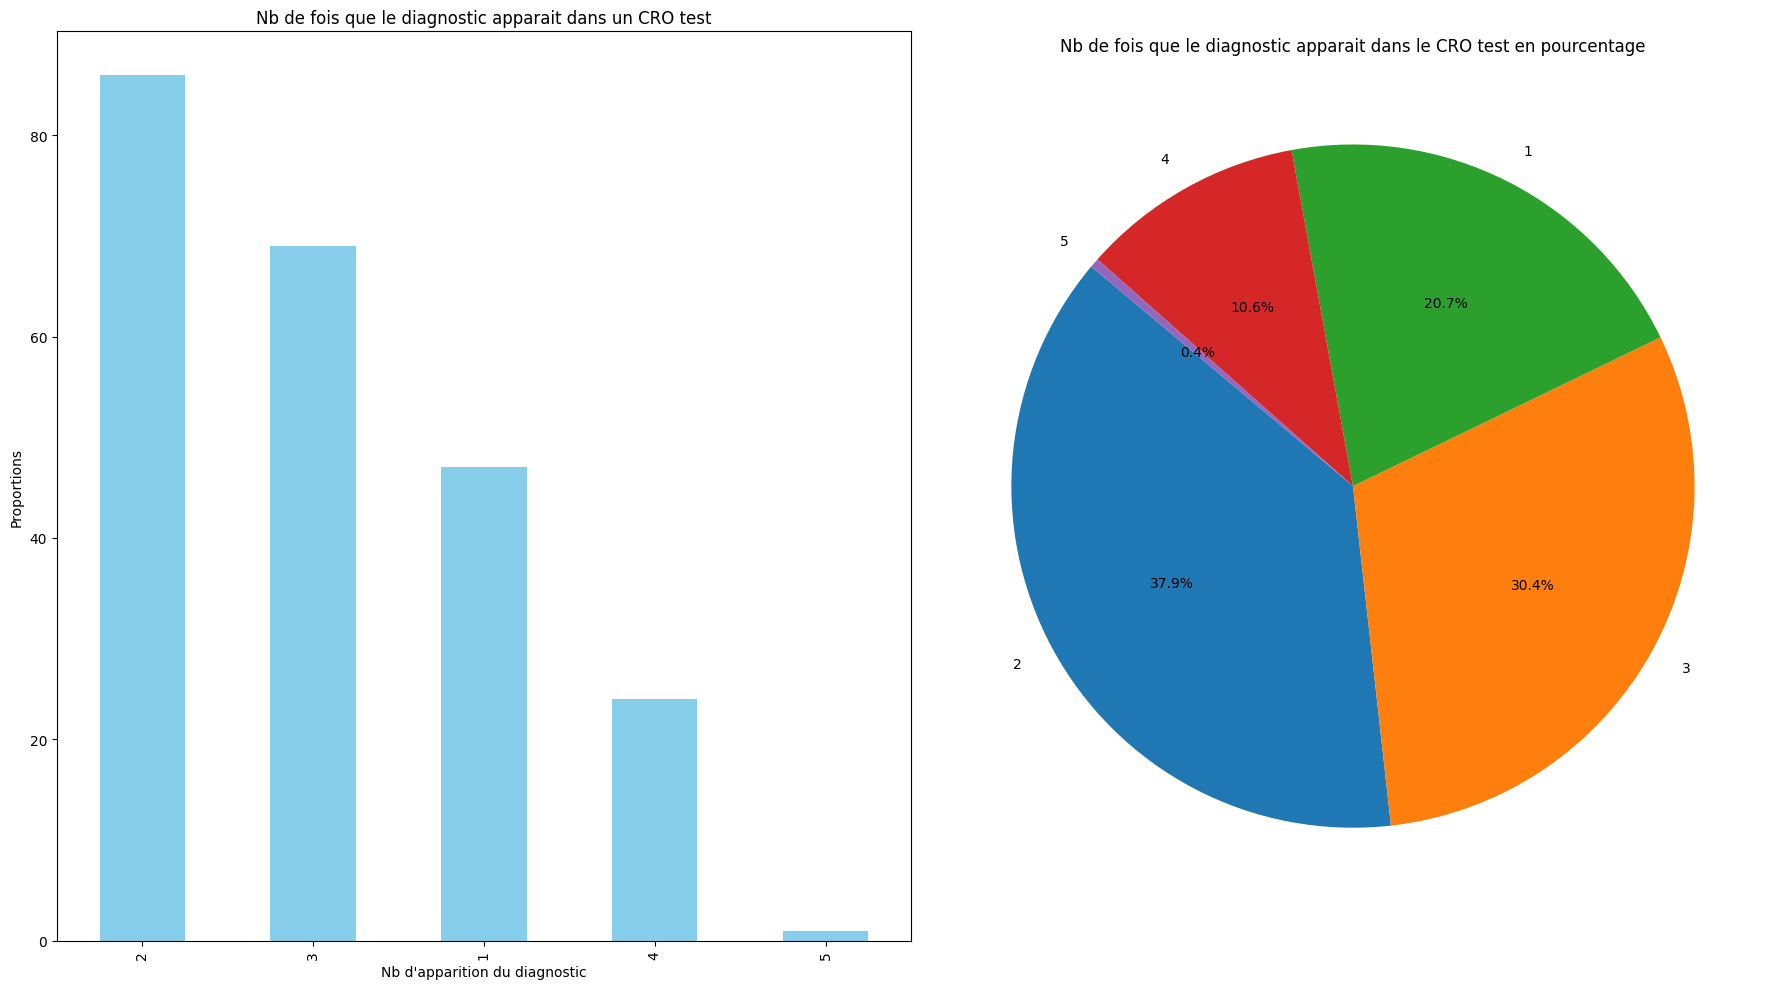

In [114]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_test = df_CRO_test_filtre_3_reinit['nb_diag'].value_counts()

# Créez un camembert
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 2)
plt.pie(value_counts_test, labels=value_counts_test.index, autopct='%1.1f%%', startangle=140)
plt.title("Nb de fois que le diagnostic apparait dans le CRO test en pourcentage")

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_test.plot(kind='bar', color='skyblue')
plt.title("Nb de fois que le diagnostic apparait dans un CRO test")
plt.xlabel("Nb d'apparition du diagnostic")
plt.ylabel('Proportions')

plt.tight_layout()

## Répartition par nb de mots (après filtration)

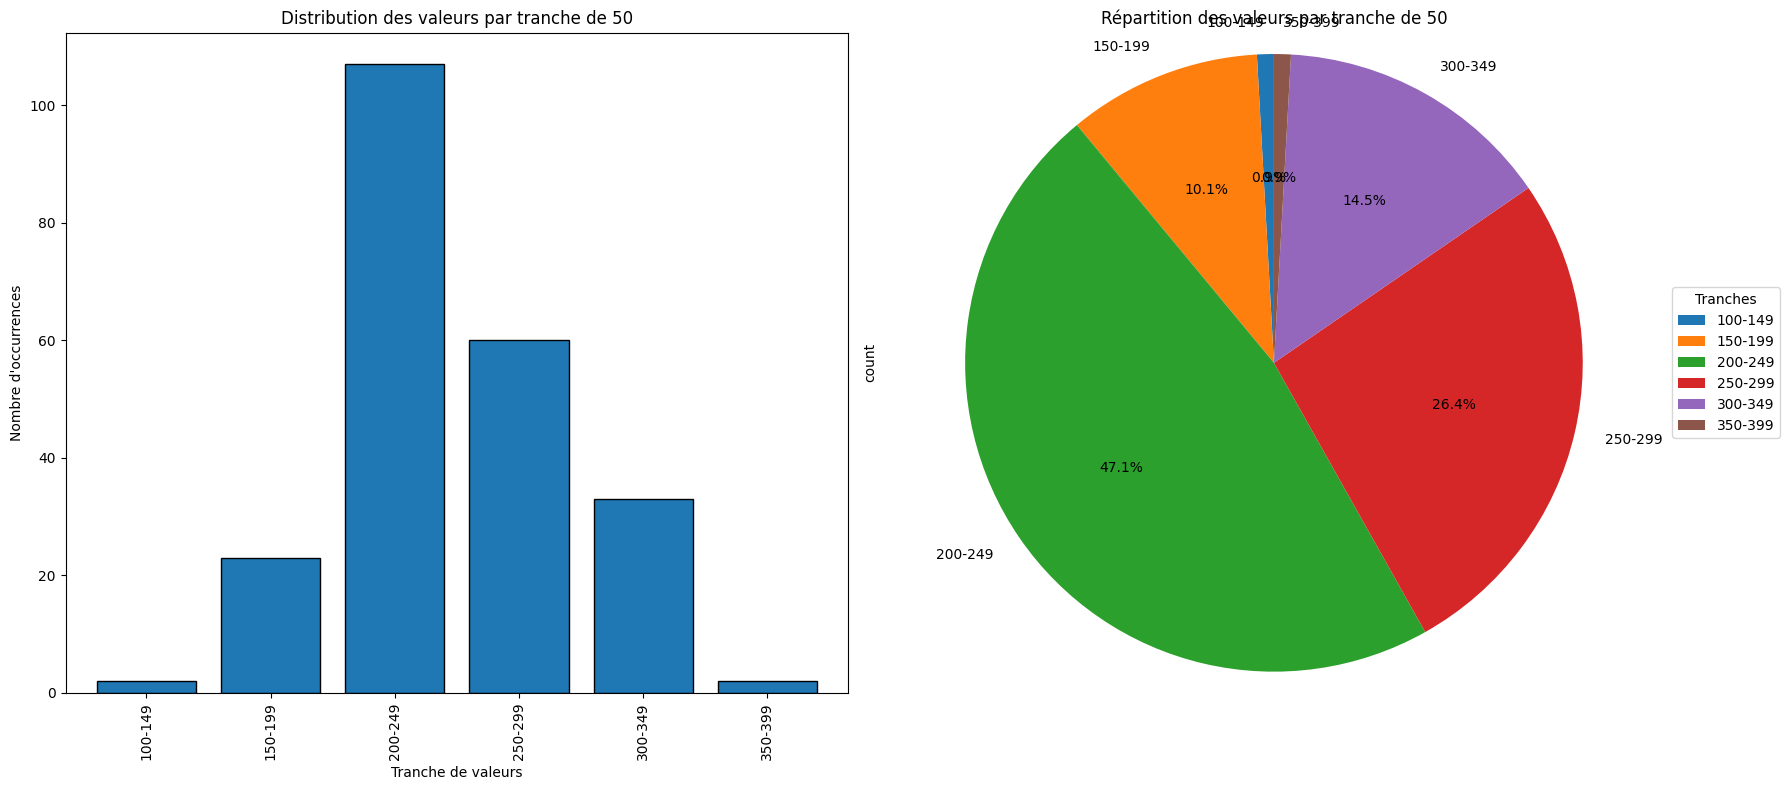

In [115]:
# Comptage du nombre d'occurrences dans chaque tranche
comptage_tranches_filtration_test = df_CRO_test_filtre_3_reinit['tranche'].value_counts(sort=False).sort_index()

# Création de la figure et des sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Graphique à barres
comptage_tranches_filtration_test[comptage_tranches_filtration_test != 0].plot(kind='bar', edgecolor='black', width=0.8, ax=ax1)
ax1.set_xlabel('Tranche de valeurs')
ax1.set_ylabel('Nombre d\'occurrences')
ax1.set_title(f'Distribution des valeurs par tranche de {tranche}')

# Graphique camembert
comptage_tranches_filtration_test[comptage_tranches_filtration_test != 0].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax2)
ax2.axis('equal')  # Assure un camembert circulaire
ax2.set_title(f'Répartition des valeurs par tranche de {tranche}')
ax2.legend(comptage_tranches_filtration_test[comptage_tranches_filtration_test != 0].index, title='Tranches', loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustements de la mise en page
plt.tight_layout()

# Enregistrement du dataframe CRO filtré

In [116]:
from sqlalchemy import create_engine
import os

def send_to_SQL(db_table, df):
    # Paramètres de connexion à la base de données MySQL
    db_username = os.getenv('DB_USER')
    db_password = os.getenv('DB_PASSWORD')
    db_host = os.getenv('DB_HOST')
    db_port = os.getenv('DB_PORT')
    db_database = os.getenv('DB_DATABASE')

    # Créer une connexion à la base de données MySQL avec SQLAlchemy
    engine = create_engine(f"mysql+pymysql://{db_username}:{db_password}@{db_host}:{db_port}/{db_database}")

    # # Envoyer le DataFrame en tant que table MySQL
    df.to_sql(name=db_table, con=engine, index=False, if_exists='replace')

    # Récupérer les données de la table MySQL
    query = f"SELECT * FROM {db_table}"
    df_from_mysql = pd.read_sql(query, con=engine)

    # Afficher le DataFrame récupéré depuis MySQL
    print("DataFrame récupéré depuis MySQL:")
    print(df_from_mysql)

In [117]:
df_CRO_all_filtre_3 = pd.concat([df_CRO_filtre_3_reinit, df_CRO_test_filtre_3_reinit], ignore_index=True)

In [118]:
send_to_SQL('CRO', df_CRO_all_filtre_3[['CRO', 'id_diag', 'id_med', 'nir', 'source', 'operation']])

DataFrame récupéré depuis MySQL:
                                                    CRO id_diag id_med  \
0     L'examen histopathologique de l'exérèse de pea...      20     72   
1     Centre Hospitalier Universitaire\nService d'An...      60      7   
2     Dr Thierry Foucher\nAnatomopathologiste\nLabor...      20     21   
3     Compte rendu d'histopathologie\n\nNom de l'ana...      61     52   
4     Compte rendu d'histopathologie\n\nPatient:\nNo...      22     65   
...                                                 ...     ...    ...   
2097  Biopsie de foie réalisée chez Olivier Marie, n...      79     48   
2098  Biopsie de foie\nRésumé :\nLe présent rapport ...      70     75   
2099  Biopsie de foie réalisée chez Margaud Blin, né...      77     43   
2100  Biopsie de foie\nRésumé :\nLe présent rapport ...      69     87   
2101  Biopsie de foie réalisée chez Chantal Allard, ...      79     75   

                         nir                          source   operation  
0  